In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_ml_ready.csv
/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_clean.csv
/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/database.sqlite


In [2]:
print("✈️✈️✈️ Welcome to the Airline Sentiment Analysis Project! ✈️✈️✈️")
print("\n🚀 Introduction:")
print("In the fast-paced world of social media, airlines are constantly under the spotlight. ")
print("Customers share their experiences—good, bad, and neutral—in real-time on platforms like Twitter. ")
print("This project dives into analyzing these sentiments to help airlines understand customer feedback better.")
print("😊 Positive vibes? 😠 Complaints? Or just neutral chit-chat? Let's classify them using Machine Learning!")

print("\n🛫 Problem Framing:")
print("The goal is to build a robust ML model that can automatically classify tweets about airlines ")
print("into three categories: Positive (2), Neutral (1), or Negative (0). ")
print("This can enable airlines to monitor public opinion, respond to issues promptly, ")
print("and improve their services based on data-driven insights.")
print("Challenges include handling noisy text data, sarcasm, abbreviations, and imbalanced classes ")
print("(with more negative sentiments than positive ones). We'll use techniques like NLP preprocessing, ")
print("feature engineering, and models such as Logistic Regression or Neural Networks to tackle this.")

print("\n📊 Dataset Description:")
print("We have two complementary datasets derived from Twitter data on US airlines in 2015:")
print("- 'twitter_airline_sentiment_ml_ready.csv': Optimized for ML with 13,976 rows and key columns like ")
print("  'clean_text' (preprocessed tweet), 'sentiment_label' (0: negative, 1: neutral, 2: positive), ")
print("  'airline' (e.g., Virgin America, United, Southwest, Delta, US Airways, American), ")
print("  'word_count', 'avg_word_length', and 'tweet_year' (all from 2015).")
print("  Sentiment Distribution: Negative: 9,019 | Neutral: 2,824 | Positive: 2,133")
print("- 'twitter_airline_sentiment_clean.csv': More detailed with additional columns like ")
print("  'airline_sentiment' (text label), 'airline_sentiment_confidence', 'negativereason' (e.g., Late Flight), ")
print("  'tweet_created' (timestamp), 'tweet_month', 'tweet_day', 'char_count'. Same row count and airlines.")
print("These datasets provide cleaned tweet text, labels, and metadata for training sentiment classifiers.")
print("Unique Airlines: Virgin America, United, Southwest, Delta, US Airways, American")
print("All data from 2015, capturing real customer voices! 🌟")

print("\n🎉 Let's take off on this ML journey! 🎉")

✈️✈️✈️ Welcome to the Airline Sentiment Analysis Project! ✈️✈️✈️

🚀 Introduction:
In the fast-paced world of social media, airlines are constantly under the spotlight. 
Customers share their experiences—good, bad, and neutral—in real-time on platforms like Twitter. 
This project dives into analyzing these sentiments to help airlines understand customer feedback better.
😊 Positive vibes? 😠 Complaints? Or just neutral chit-chat? Let's classify them using Machine Learning!

🛫 Problem Framing:
The goal is to build a robust ML model that can automatically classify tweets about airlines 
into three categories: Positive (2), Neutral (1), or Negative (0). 
This can enable airlines to monitor public opinion, respond to issues promptly, 
and improve their services based on data-driven insights.
Challenges include handling noisy text data, sarcasm, abbreviations, and imbalanced classes 
(with more negative sentiments than positive ones). We'll use techniques like NLP preprocessing, 
feature engin

In [5]:
print("""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
          ✈️ DATA CLEANING & PREPROCESSING CODE ✈️
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

This code performs essential data cleaning and preprocessing steps 
on the Twitter Airline Sentiment dataset before model building.

Key Steps Covered:
1. Loading the dataset
2. Basic exploration (info, describe, missing values)
3. Handling missing values (if any)
4. Text cleaning (removing special characters, URLs, mentions, etc.)
5. Creating useful features (if needed)
6. Final verification

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

# ────────────────────────────────────────────────────────────────
# 1. Import necessary libraries
# ────────────────────────────────────────────────────────────────
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

# Optional: Download stopwords if not already present
# import nltk
# nltk.download('stopwords')

print("Libraries imported successfully ✓\n")

# ────────────────────────────────────────────────────────────────
# 2. Load the dataset
# ────────────────────────────────────────────────────────────────
# Choose one of the following depending on which file you're using

# Option A: ML-ready version (recommended for modeling)
df = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_ml_ready.csv")

# Option B: More detailed cleaned version
# df = pd.read_csv("twitter_airline_sentiment_clean.csv")

print("Dataset loaded successfully ✓")
print(f"Shape of dataset: {df.shape}\n")

# ────────────────────────────────────────────────────────────────
# 3. Basic Exploration
# ────────────────────────────────────────────────────────────────

print("═"*70)
print("                  1. df.info() - Data Structure")
print("═"*70)
df.info()
print("\n")

print("═"*70)
print("                  2. df.describe() - Statistical Summary")
print("═"*70)
print(df.describe(include='all').T)
print("\n")

print("═"*70)
print("         3. Missing Values Check - df.isnull().sum()")
print("═"*70)
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_percentage.round(2)
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])
if missing.sum() == 0:
    print("Great! No missing values found in the dataset ✨")
print("\n")

# ────────────────────────────────────────────────────────────────
# 4. Basic Text Cleaning Function
# ────────────────────────────────────────────────────────────────

def clean_tweet(text):
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove twitter handles (@username)
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags symbol (but keep the word)
    text = re.sub(r'#', '', text)
    
    # Remove special characters, numbers, punctuations
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

print("Text cleaning function created ✓\n")

# Apply cleaning
print("Applying text cleaning...")
main_text_column = 'clean_text'  # ← change if your column name is different

df['clean_text_processed'] = df[main_text_column].apply(clean_tweet)

print("Text cleaning completed ✓")
print("Sample of cleaned text vs original:\n")
sample = df[[main_text_column, 'clean_text_processed']].sample(5, random_state=42)
print(sample)
print("\n")

# ────────────────────────────────────────────────────────────────
# 5. Optional: Remove stopwords (uncomment if needed)
# ────────────────────────────────────────────────────────────────

# stop_words = set(stopwords.words('english'))

# def remove_stopwords(text):
#     return ' '.join([word for word in text.split() if word not in stop_words])

# df['clean_text_processed'] = df['clean_text_processed'].apply(remove_stopwords)

# print("Stopwords removed (optional step) ✓\n")

# ────────────────────────────────────────────────────────────────
# 6. Final Verification
# ────────────────────────────────────────────────────────────────

print("═"*70)
print("                  FINAL DATASET OVERVIEW")
print("═"*70)

print("Columns after processing:")
print(df.columns.tolist())
print("\n")

print("Sentiment distribution:")
print(df['sentiment_label'].value_counts())
print("\n")

print("Sample of final cleaned data:")
print(df[[main_text_column, 'clean_text_processed', 'sentiment_label']].sample(8))
print("\n")

print("✈️ Data is now ready for Feature Engineering & Model Building! ✈️")
print("Happy Modeling! 🚀")


━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
          ✈️ DATA CLEANING & PREPROCESSING CODE ✈️
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

This code performs essential data cleaning and preprocessing steps 
on the Twitter Airline Sentiment dataset before model building.

Key Steps Covered:
1. Loading the dataset
2. Basic exploration (info, describe, missing values)
3. Handling missing values (if any)
4. Text cleaning (removing special characters, URLs, mentions, etc.)
5. Creating useful features (if needed)
6. Final verification

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Libraries imported successfully ✓

Dataset loaded successfully ✓
Shape of dataset: (13976, 6)

══════════════════════════════════════════════════════════════════════
                  1. df.info() - Data Structure
══════════════════════════════════════════════════════════════════════
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13976 entries

In [6]:
df=pd.read_csv('/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_ml_ready.csv')
df

clean_text  sentiment_label  \
0      plus youve added commercials to the experience...                2   
1      i didnt today must mean i need to take another...                1   
2      its really aggressive to blast obnoxious enter...                0   
3                and its a really big bad thing about it                0   
4      seriously would pay a flight for seats that di...                0   
...                                                  ...              ...   
13971  thank you we got on a different flight to chicago                2   
13972  leaving over minutes late flight no warnings o...                0   
13973                  please bring american airlines to                1   
13974  you have my money you change my flight and don...                0   
13975  we have ppl so we need know how many seats are...                1   

              airline  word_count  avg_word_length  tweet_year  
0      Virgin America           8         6.500000        2015  
1      Virgin America          11         4.636364        2015  
2      Virgin America          16         6.562500        2015  
3      Virgin America           9         4.333333        2015  
4      Virgin America          21         5.380952        2015  
...               ...         ...              ...         ...  
13971        American          10         4.900000        2015  
13972        American          20         6.400000        2015  
13973        American           5         6.600000        2015  
13974        American          22         5.272727        2015  
13975        American          26         4.500000        2015  

[13976 rows x 6 columns]

Loading datasets...

ML-ready shape:     (13976, 6)
Detailed shape:     (13976, 13)



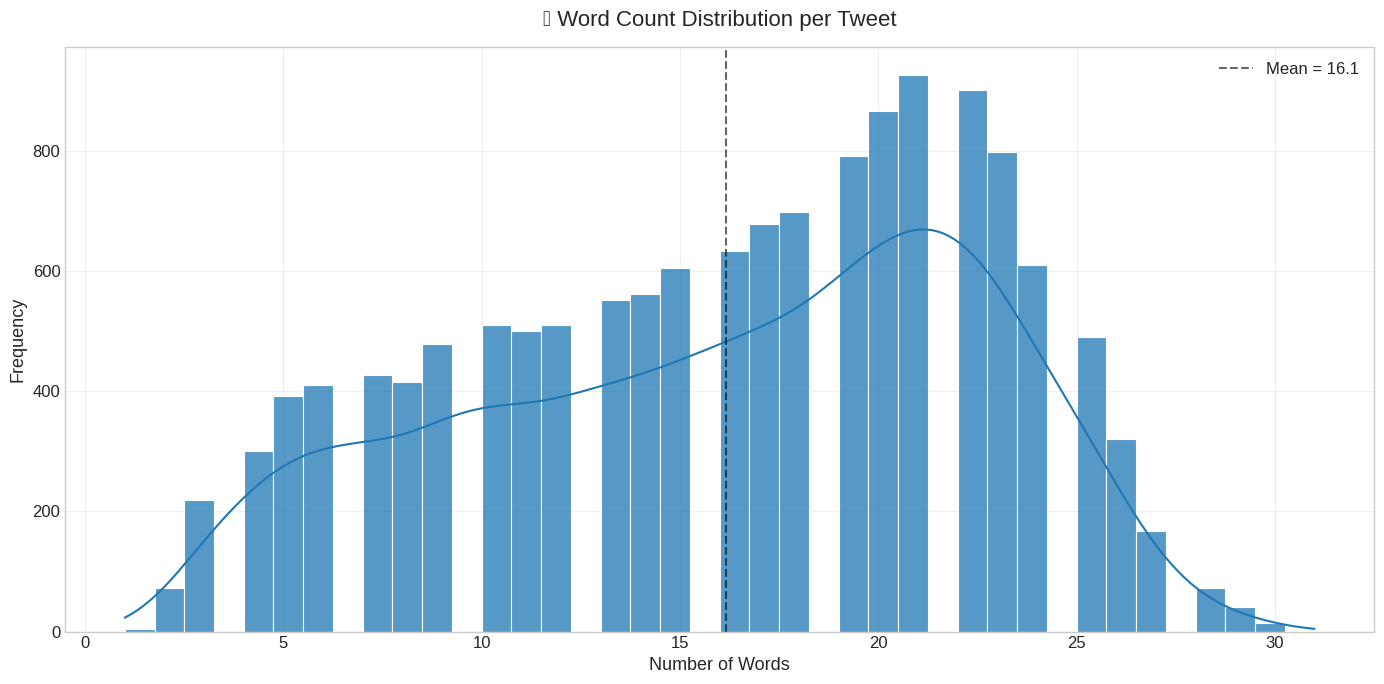

Most tweets: 5–25 words



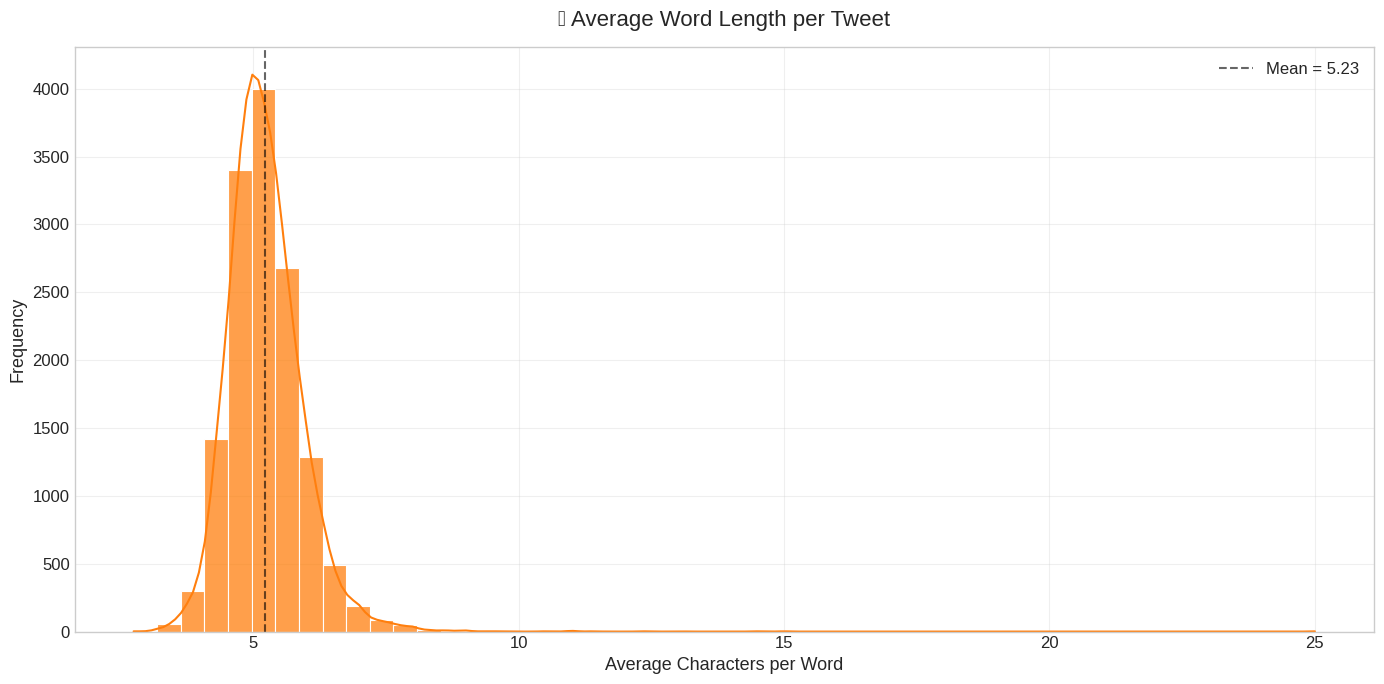

Typical range: ~4.5–5.5 characters per word



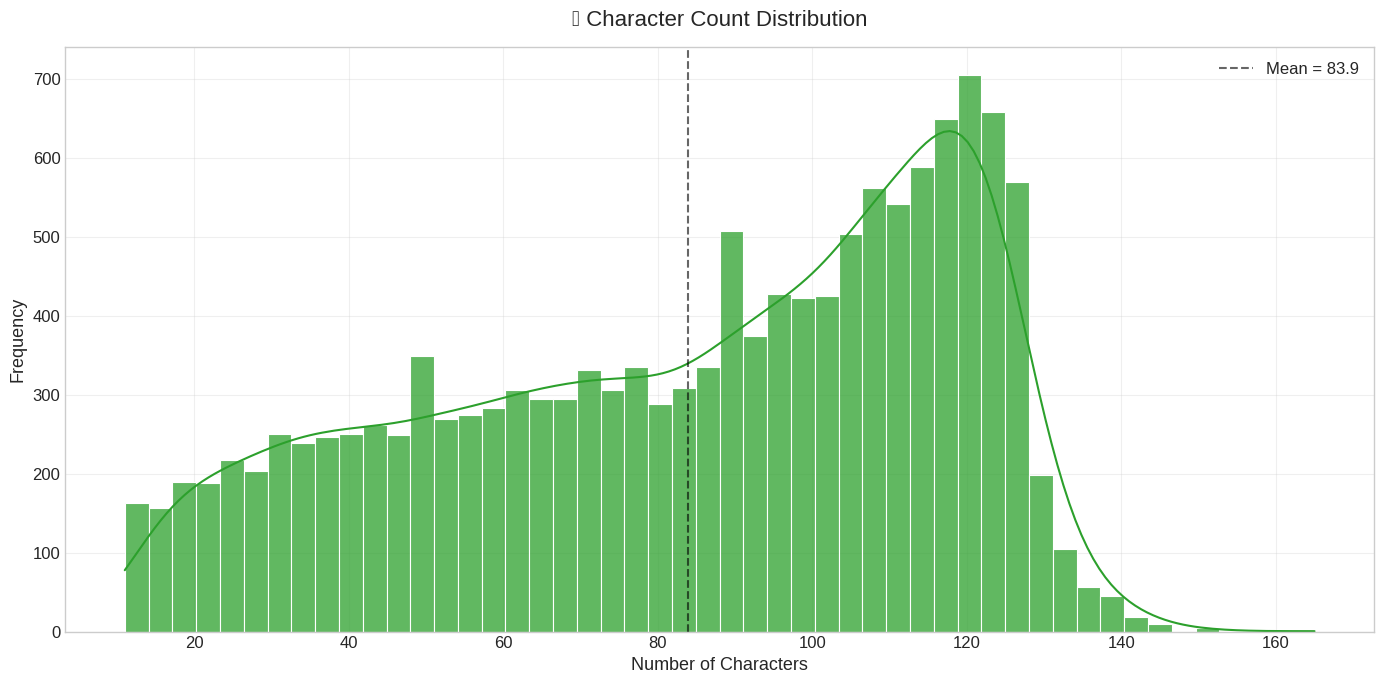

Most tweets between 50–140 characters (classic Twitter limit)



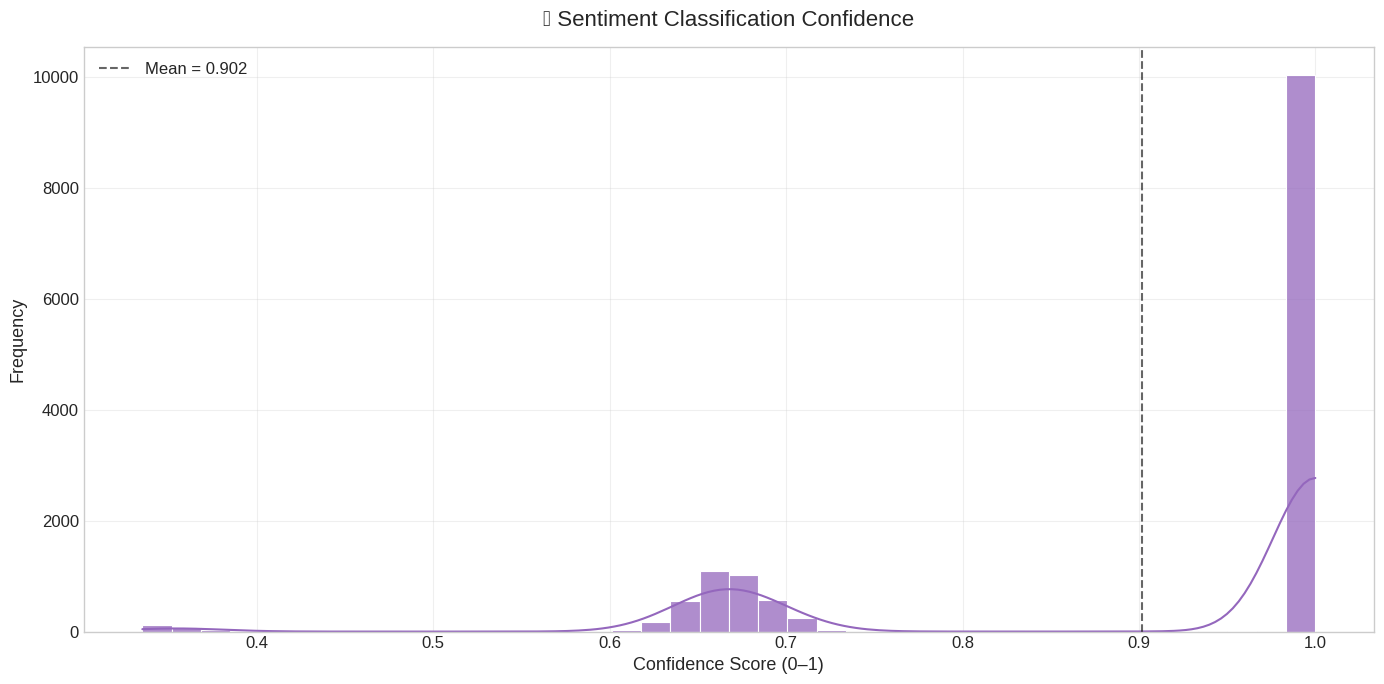

Most labels have very high confidence (>0.8)



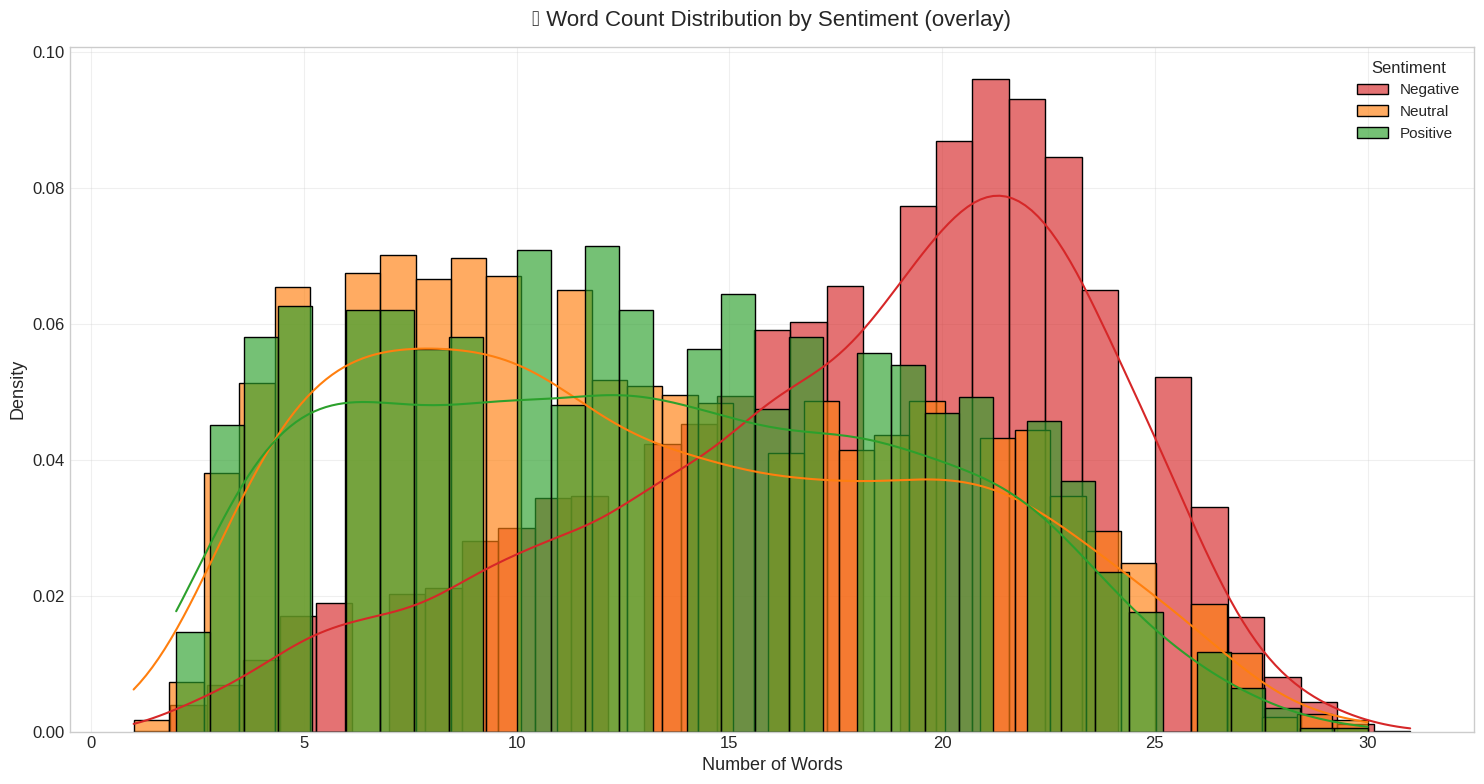

Observation: Negative tweets clearly tend to be longer than positive ones


════════════════════════════════════════════════════════════════════════════════
   ✈️ COMPLETED: Histograms ✈️
════════════════════════════════════════════════════════════════════════════════
Used strong, easily distinguishable colors:
• Blue    → Word count
• Orange  → Avg word length
• Green   → Character count
• Purple  → Confidence
• Red/Orange/Green → Negative/Neutral/Positive comparison

Ready for the next step of analysis! 🚀


In [11]:
# =============================================================================
#      ✈️ HISTOGRAMS + KDE with EASILY DISTINGUISHABLE COLORS ✈️
# =============================================================================
# Goal: Clear, high-contrast visualization of key numerical distributions
#       with colors that are easy to distinguish even for colorblind viewers
#
# Color palette used:
#   - Word count         → teal (#1f77b4 - strong blue)
#   - Avg word length    → coral (#ff7f0e - bright orange)
#   - Character count    → lime green (#2ca02c)
#   - Confidence         → purple (#9467bd)
#   - By sentiment       → Red / Orange / Green classic trio
# =============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ── Style settings ───────────────────────────────────────────────────────────
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

# High-contrast palette
COLOR_WORDCOUNT     = '#1f77b4'   # strong blue
COLOR_AVGLEN        = '#ff7f0e'   # vivid orange
COLOR_CHARCOUNT     = '#2ca02c'   # forest green
COLOR_CONFIDENCE    = '#9467bd'   # rich purple
COLOR_NEGATIVE      = '#d62728'   # strong red
COLOR_NEUTRAL       = '#ff7f0e'   # bright orange
COLOR_POSITIVE      = '#2ca02c'   # vivid green

# ─────────────────────────────────────────────────────────────────────────────
#  Load datasets
# ─────────────────────────────────────────────────────────────────────────────

print("Loading datasets...\n")

df_ml = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_ml_ready.csv")
df_clean = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_clean.csv")

print(f"ML-ready shape:     {df_ml.shape}")
print(f"Detailed shape:     {df_clean.shape}\n")

# =============================================================================
# 1. Word Count Distribution
# =============================================================================
plt.figure(figsize=(14, 7))

sns.histplot(data=df_ml, x='word_count', kde=True,
             bins=40, color=COLOR_WORDCOUNT, alpha=0.75, edgecolor='white', linewidth=0.8)

plt.title('📊 Word Count Distribution per Tweet', fontsize=16, pad=15)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

plt.axvline(df_ml['word_count'].mean(), color='black', linestyle='--', alpha=0.6,
            label=f'Mean = {df_ml["word_count"].mean():.1f}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Most tweets: 5–25 words\n")

# =============================================================================
# 2. Average Word Length Distribution
# =============================================================================
plt.figure(figsize=(14, 7))

sns.histplot(data=df_ml, x='avg_word_length', kde=True,
             bins=50, color=COLOR_AVGLEN, alpha=0.75, edgecolor='white', linewidth=0.8)

plt.title('📏 Average Word Length per Tweet', fontsize=16, pad=15)
plt.xlabel('Average Characters per Word', fontsize=13)
plt.ylabel('Frequency', fontsize=13)

plt.axvline(df_ml['avg_word_length'].mean(), color='black', linestyle='--', alpha=0.6,
            label=f'Mean = {df_ml["avg_word_length"].mean():.2f}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Typical range: ~4.5–5.5 characters per word\n")

# =============================================================================
# 3. Character Count Distribution 
# =============================================================================
if 'char_count' in df_clean.columns:
    plt.figure(figsize=(14, 7))
    
    sns.histplot(data=df_clean, x='char_count', kde=True,
                 bins=50, color=COLOR_CHARCOUNT, alpha=0.75, edgecolor='white', linewidth=0.8)
    
    plt.title('📝 Character Count Distribution', fontsize=16, pad=15)
    plt.xlabel('Number of Characters', fontsize=13)
    plt.ylabel('Frequency', fontsize=13)
    
    plt.axvline(df_clean['char_count'].mean(), color='black', linestyle='--', alpha=0.6,
                label=f'Mean = {df_clean["char_count"].mean():.1f}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("Most tweets between 50–140 characters (classic Twitter limit)\n")

# =============================================================================
# 4. Sentiment Confidence Distribution 
# =============================================================================
if 'airline_sentiment_confidence' in df_clean.columns:
    plt.figure(figsize=(14, 7))
    
    sns.histplot(data=df_clean, x='airline_sentiment_confidence', kde=True,
                 bins=40, color=COLOR_CONFIDENCE, alpha=0.75, edgecolor='white', linewidth=0.8)
    
    plt.title('🎯 Sentiment Classification Confidence', fontsize=16, pad=15)
    plt.xlabel('Confidence Score (0–1)', fontsize=13)
    plt.ylabel('Frequency', fontsize=13)
    
    plt.axvline(df_clean['airline_sentiment_confidence'].mean(), color='black', linestyle='--', alpha=0.6,
                label=f'Mean = {df_clean["airline_sentiment_confidence"].mean():.3f}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("Most labels have very high confidence (>0.8)\n")

# =============================================================================
# 5. Word Count by Sentiment – Histograms
# =============================================================================
plt.figure(figsize=(15, 8))

for label, color, name in zip([0,1,2], [COLOR_NEGATIVE, COLOR_NEUTRAL, COLOR_POSITIVE],
                             ['Negative', 'Neutral', 'Positive']):
    subset = df_ml[df_ml['sentiment_label'] == label]
    sns.histplot(data=subset, x='word_count', kde=True,
                 bins=35, color=color, alpha=0.65, label=name, stat='density')

plt.title('📊 Word Count Distribution by Sentiment (overlay)', fontsize=16, pad=15)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend(title='Sentiment', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Observation: Negative tweets clearly tend to be longer than positive ones\n")

# =============================================================================
#                                 Summary
# =============================================================================

print("\n" + "═"*80)
print("   ✈️ COMPLETED: Histograms ✈️")
print("═"*80)
print("Used strong, easily distinguishable colors:")
print("• Blue    → Word count")
print("• Orange  → Avg word length")
print("• Green   → Character count")
print("• Purple  → Confidence")
print("• Red/Orange/Green → Negative/Neutral/Positive comparison")
print("\nReady for the next step of analysis! 🚀")

Loading datasets...

ML-ready dataset shape:    (13976, 6)
Detailed clean dataset shape: (13976, 13)



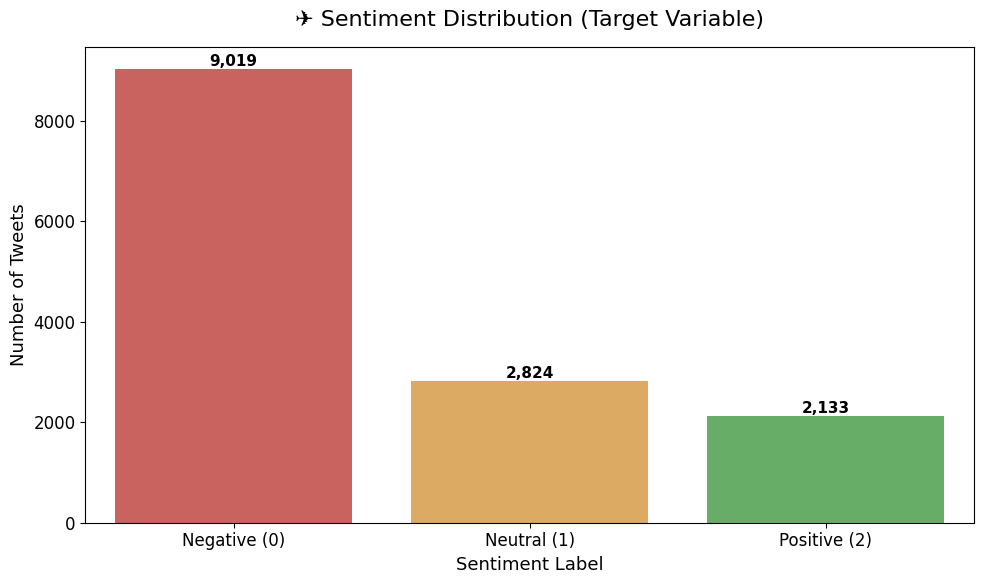

Observation: Strong negative bias — very common in airline Twitter complaints



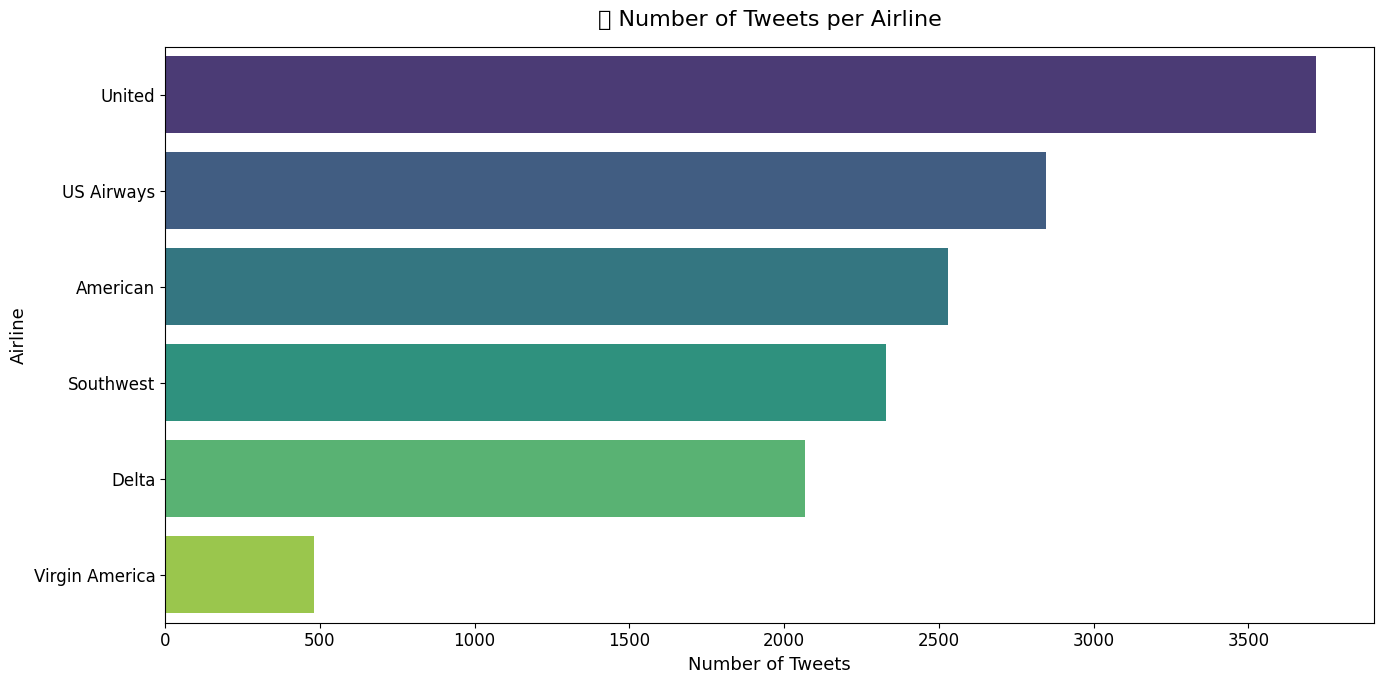

Observation: US Airways, United & American dominate complaints



<Figure size 1500x800 with 0 Axes>

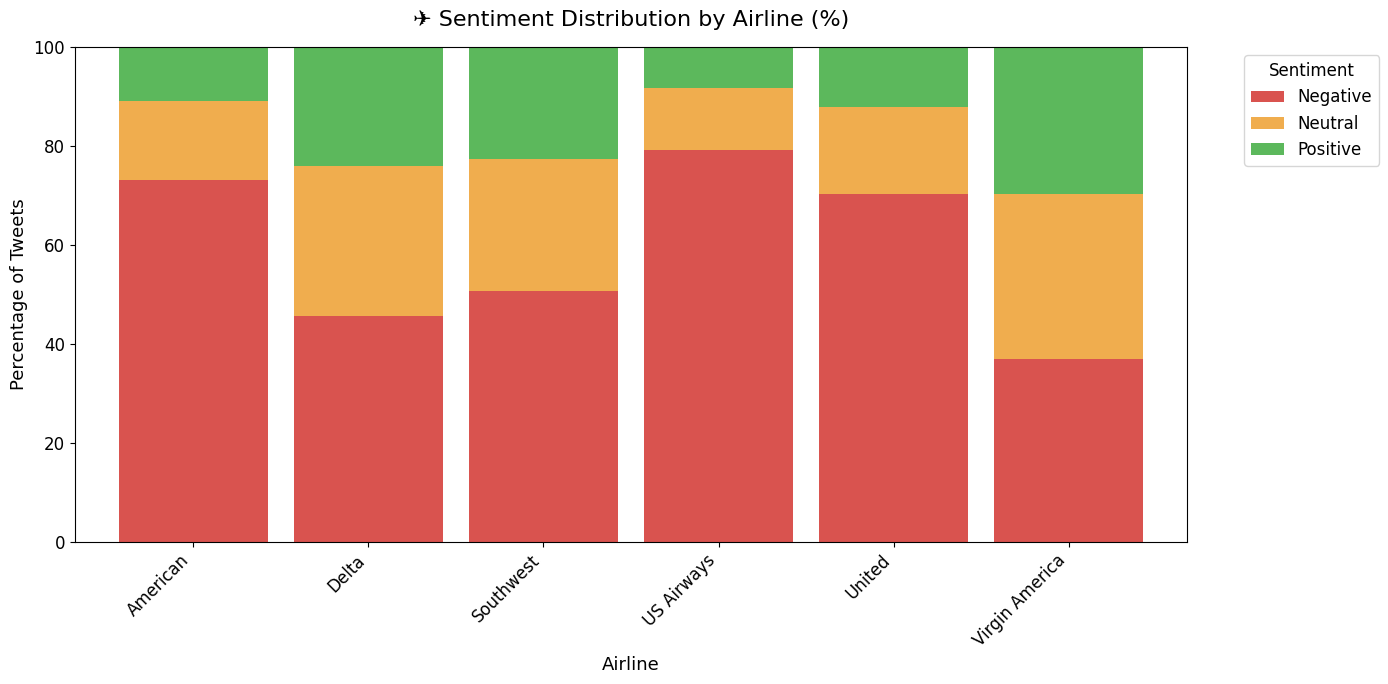

Observation: Some airlines have clearly worse sentiment ratios



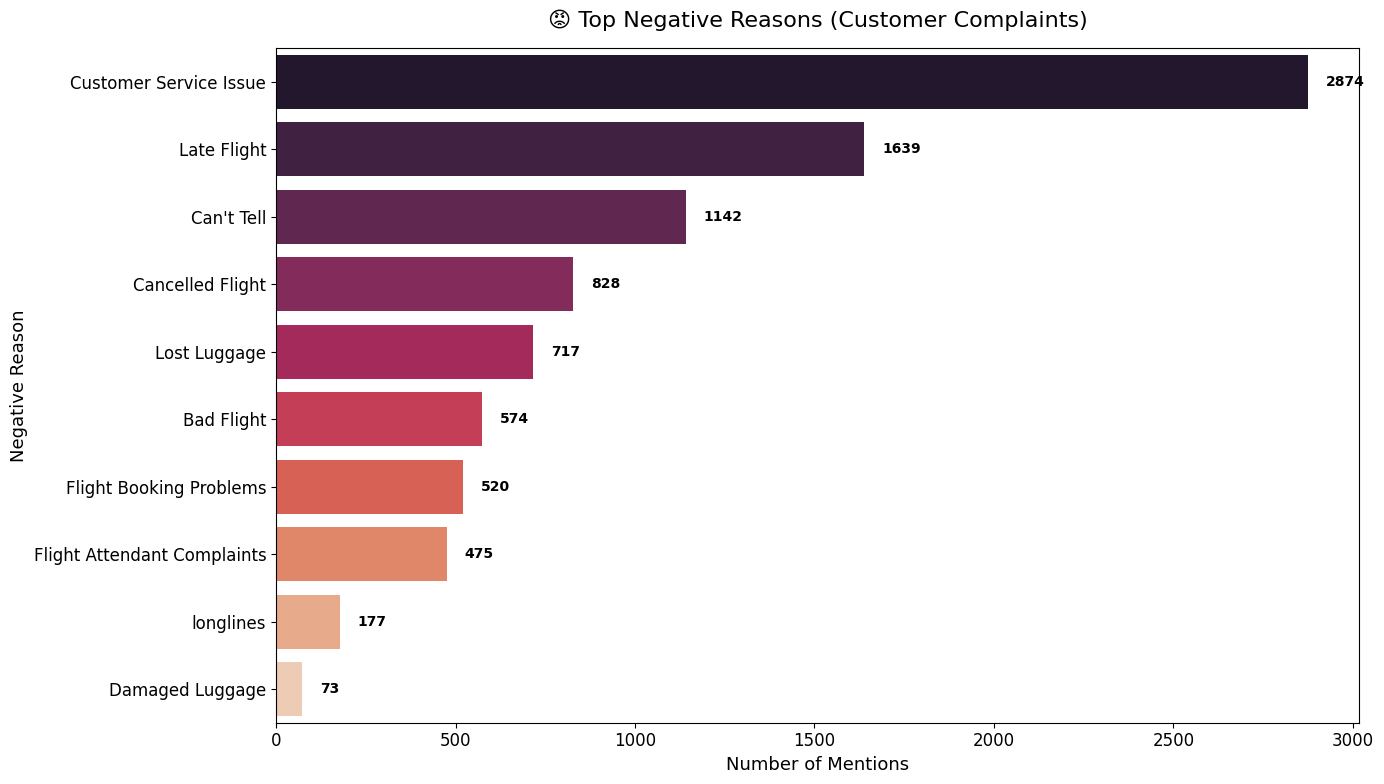

Observation: Customer Service, Late Flight & Cancelled Flight dominate complaints



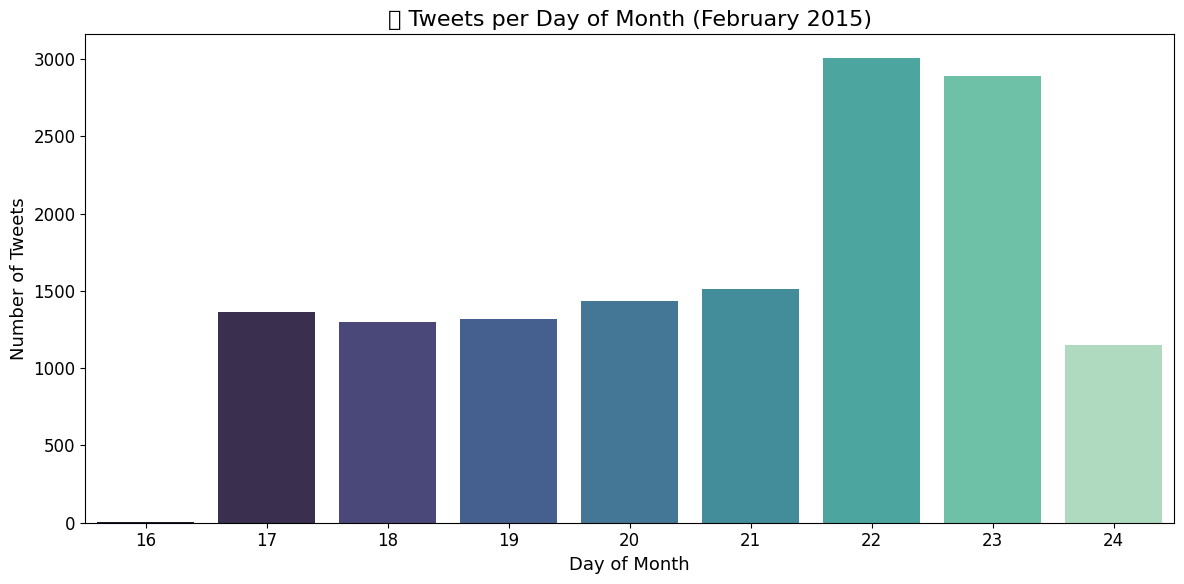

Observation: Complaints peak around specific dates (often weather events)


          ✈️ COMPLETED: All Key Bar & Count Plots ✈️
Most important insights:
• Very strong negative sentiment bias
• US Airways, United, American → most complaints
• Customer Service, Late Flight, Cancelled Flight → top pain points
• 100% stacked bar → best for comparing sentiment ratios across airlines

Ready for modeling & deeper analysis! 🚀


In [8]:
# =============================================================================
#          ✈️ IMPORTANT BAR PLOTS & COUNT PLOTS ✈️
# =============================================================================
# Goal: Visualize key categorical distributions and relationships
#       in both versions of the Twitter Airline Sentiment dataset
#
# Most Important Visualizations:
# 1. Sentiment Label Count (Target variable)
# 2. Number of Tweets per Airline
# 3. Sentiment Distribution by Airline (stacked / grouped)
# 4. Top Negative Reasons
# 5. Sentiment % by Airline (100% stacked bar)
# 6. Tweets per Day of Month / Month (if timestamp columns available)
# =============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ── Style settings ───────────────────────────────────────────────────────────
plt.style.use('seaborn-v0_8-pastel')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

# ─────────────────────────────────────────────────────────────────────────────
#  Load both datasets
# ─────────────────────────────────────────────────────────────────────────────

print("Loading datasets...\n")

df_ml = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_ml_ready.csv")
df_clean = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_clean.csv")

print(f"ML-ready dataset shape:    {df_ml.shape}")
print(f"Detailed clean dataset shape: {df_clean.shape}\n")

# =============================================================================
#                         Plot 1: Sentiment Distribution
# =============================================================================

plt.figure(figsize=(10, 6))

ax = sns.countplot(x='sentiment_label', data=df_ml,
                   palette=['#d9534f', '#f0ad4e', '#5cb85c'])

# Add count labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('✈️ Sentiment Distribution (Target Variable)', fontsize=16, pad=15)
plt.xlabel('Sentiment Label', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks([0,1,2], ['Negative (0)', 'Neutral (1)', 'Positive (2)'])
plt.tight_layout()
plt.show()

print("Observation: Strong negative bias — very common in airline Twitter complaints\n")

# =============================================================================
#                 Plot 2: Number of Tweets per Airline
# =============================================================================

plt.figure(figsize=(14, 7))

airline_order = df_ml['airline'].value_counts().index

sns.countplot(y='airline', data=df_ml, order=airline_order,
              palette='viridis')

plt.title('📊 Number of Tweets per Airline', fontsize=16, pad=15)
plt.xlabel('Number of Tweets', fontsize=13)
plt.ylabel('Airline', fontsize=13)
plt.tight_layout()
plt.show()

print("Observation: US Airways, United & American dominate complaints\n")

# =============================================================================
#         Plot 3: Sentiment Distribution by Airline - Stacked 100% Bar
# =============================================================================

plt.figure(figsize=(15, 8))

# Using crosstab with normalization
cross = pd.crosstab(df_ml['airline'], df_ml['sentiment_label'], normalize='index') * 100

cross.plot(kind='bar', stacked=True,
           color=['#d9534f', '#f0ad4e', '#5cb85c'],
           width=0.85)

plt.title('✈️ Sentiment Distribution by Airline (%)', fontsize=16, pad=15)
plt.xlabel('Airline', fontsize=13)
plt.ylabel('Percentage of Tweets', fontsize=13)
plt.legend(title='Sentiment', 
           labels=['Negative', 'Neutral', 'Positive'],
           loc='upper right', bbox_to_anchor=(1.18, 1))
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

print("Observation: Some airlines have clearly worse sentiment ratios\n")

# =============================================================================
#           Plot 4: Top Negative Reasons 
# =============================================================================

if 'negativereason' in df_clean.columns:
    plt.figure(figsize=(14, 8))
    
    top_reasons = df_clean[df_clean['sentiment_label'] == 0]['negativereason'].value_counts().head(12)
    
    sns.barplot(x=top_reasons.values, y=top_reasons.index, palette='rocket')
    
    plt.title('😡 Top Negative Reasons (Customer Complaints)', fontsize=16, pad=15)
    plt.xlabel('Number of Mentions', fontsize=13)
    plt.ylabel('Negative Reason', fontsize=13)
    
    # Add count labels
    for i, v in enumerate(top_reasons.values):
        plt.text(v + 50, i, str(v), va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("Observation: Customer Service, Late Flight & Cancelled Flight dominate complaints\n")
else:
    print("Negative reason column not found in this dataset version\n")

# =============================================================================
#           Plot 5: Tweets per Day of Month (if available)
# =============================================================================

if 'tweet_day' in df_clean.columns:
    plt.figure(figsize=(12, 6))
    
    day_order = sorted(df_clean['tweet_day'].unique())
    
    sns.countplot(x='tweet_day', data=df_clean, order=day_order, palette='mako')
    
    plt.title('📅 Tweets per Day of Month (February 2015)', fontsize=16)
    plt.xlabel('Day of Month', fontsize=13)
    plt.ylabel('Number of Tweets', fontsize=13)
    plt.tight_layout()
    plt.show()
    
    print("Observation: Complaints peak around specific dates (often weather events)\n")

# =============================================================================
#                         Final Summary
# =============================================================================

print("\n" + "="*70)
print("          ✈️ COMPLETED: All Key Bar & Count Plots ✈️")
print("="*70)
print("Most important insights:")
print("• Very strong negative sentiment bias")
print("• US Airways, United, American → most complaints")
print("• Customer Service, Late Flight, Cancelled Flight → top pain points")
print("• 100% stacked bar → best for comparing sentiment ratios across airlines")
print("\nReady for modeling & deeper analysis! 🚀")

Loading datasets...

ML-ready shape:     (13976, 6)
Detailed shape:     (13976, 13)



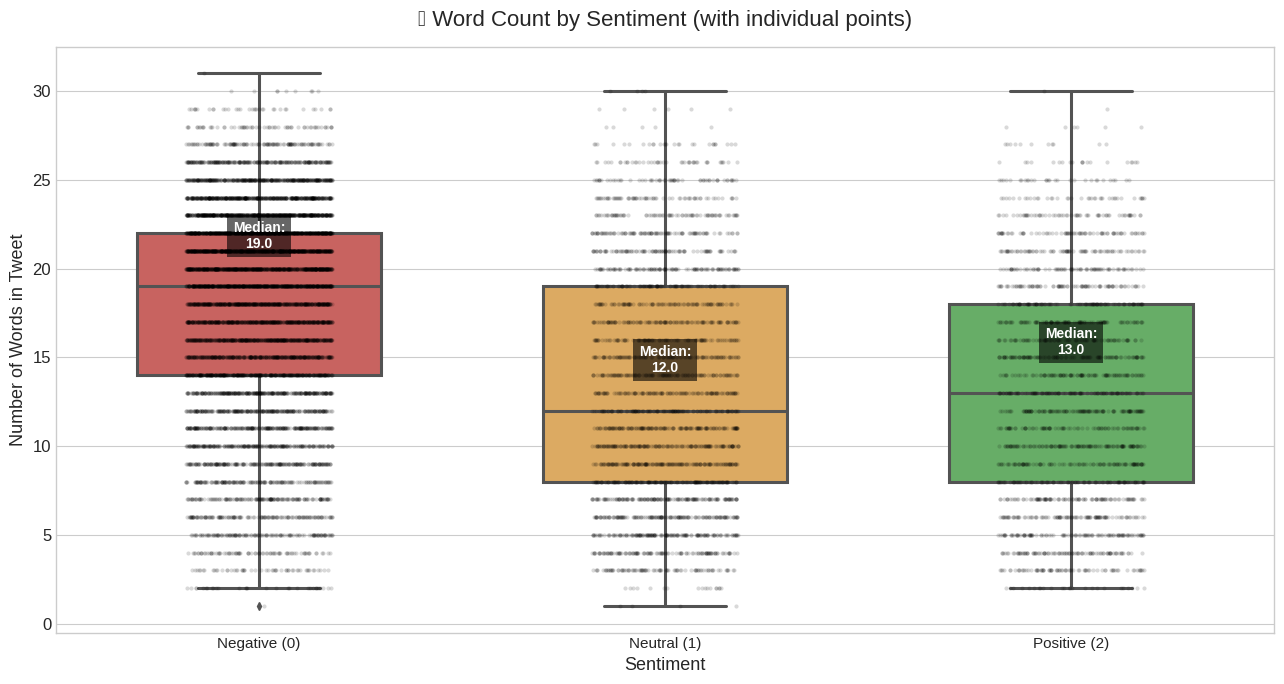

Key Insight: Negative tweets tend to be longer → more detailed complaints
           Positive tweets are usually shorter & more enthusiastic



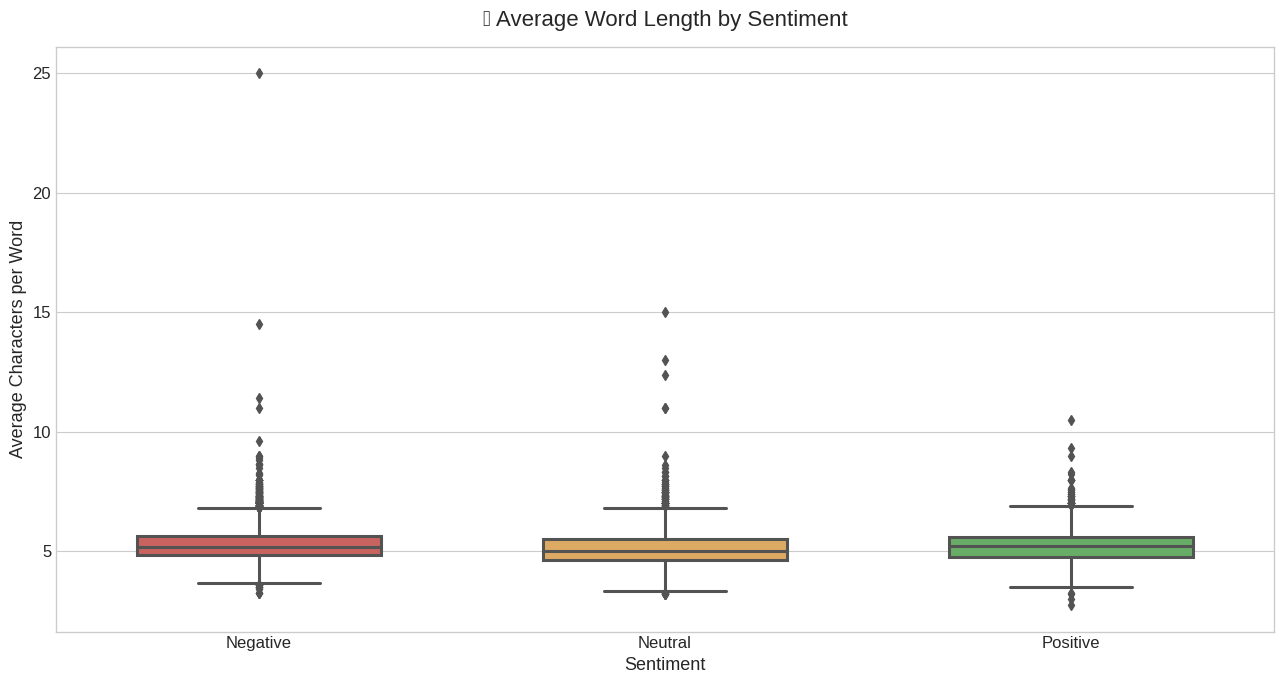

Key Insight: Small differences → negative tweets slightly use longer words
           (possibly more formal or angry language)



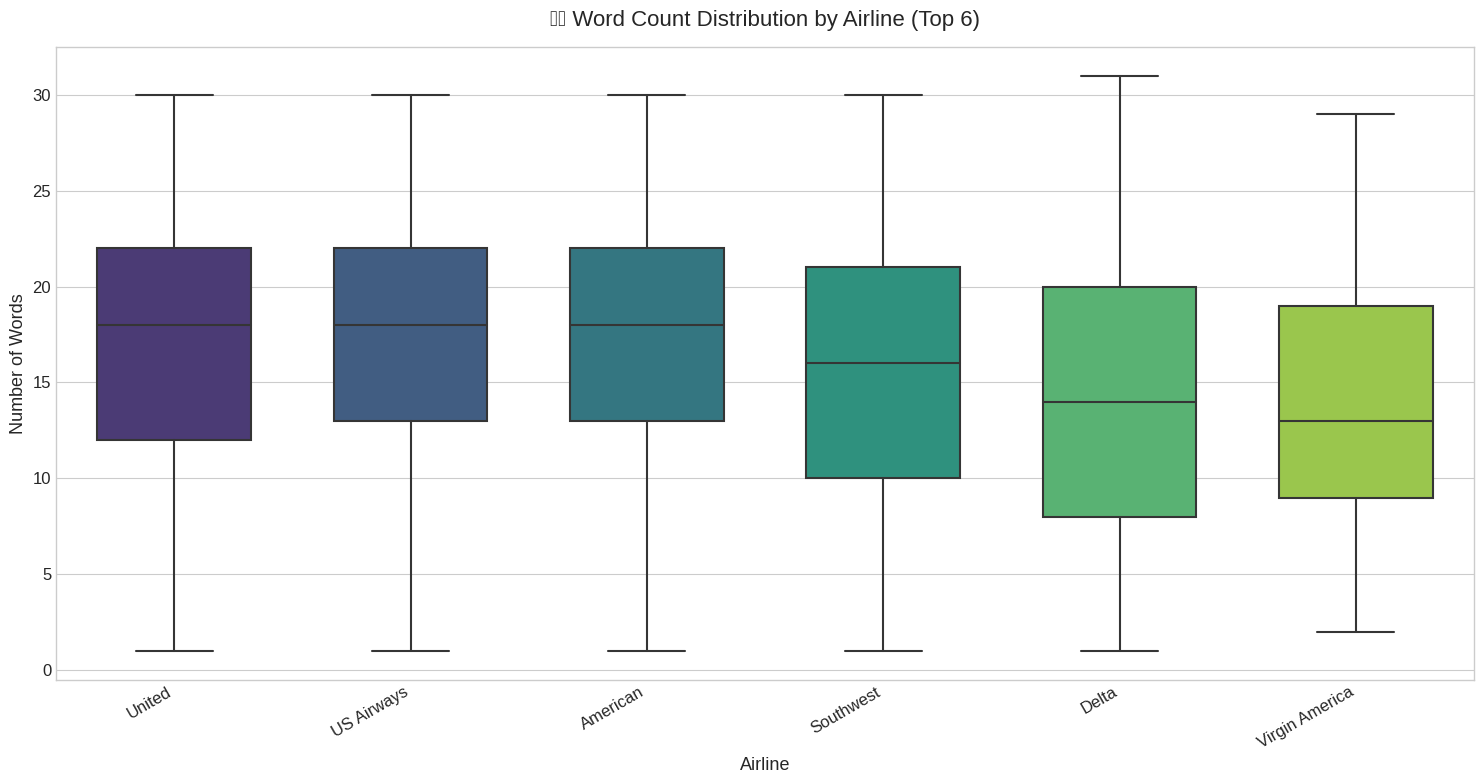

Key Insight: Complaint length varies somewhat between airlines
           → Some airlines tend to receive slightly longer/more detailed complaints



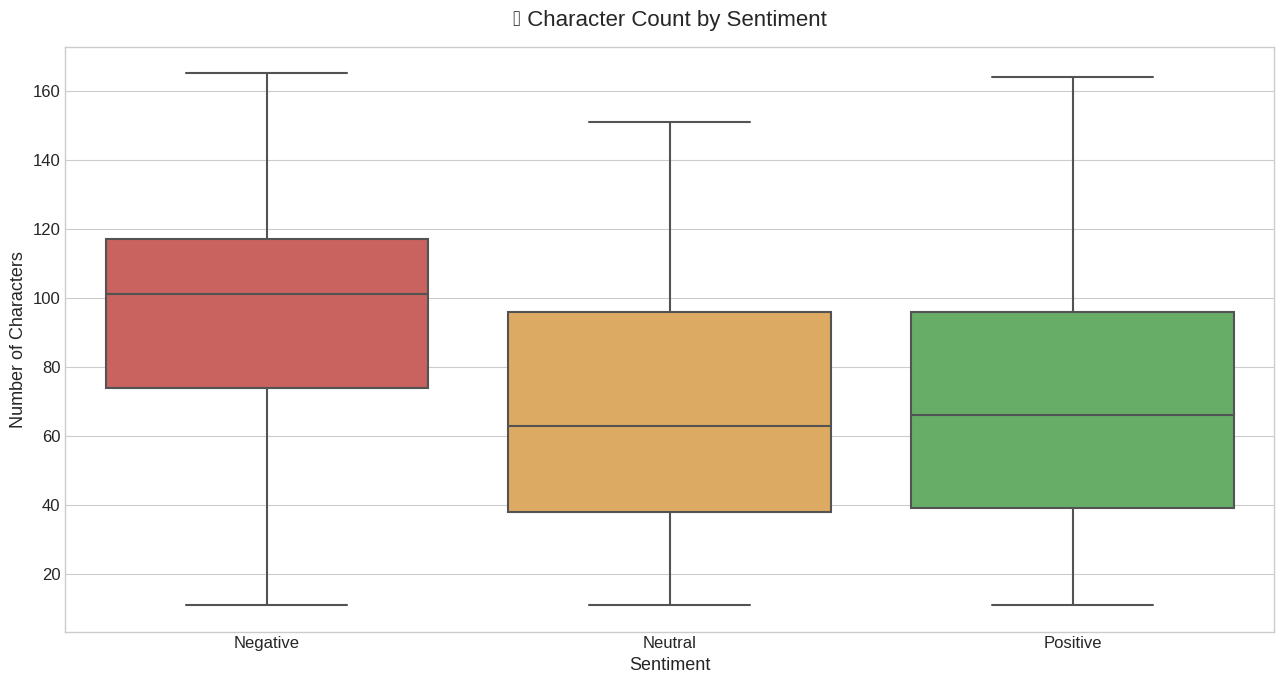

Key Insight: Similar pattern to word count → negatives are longer



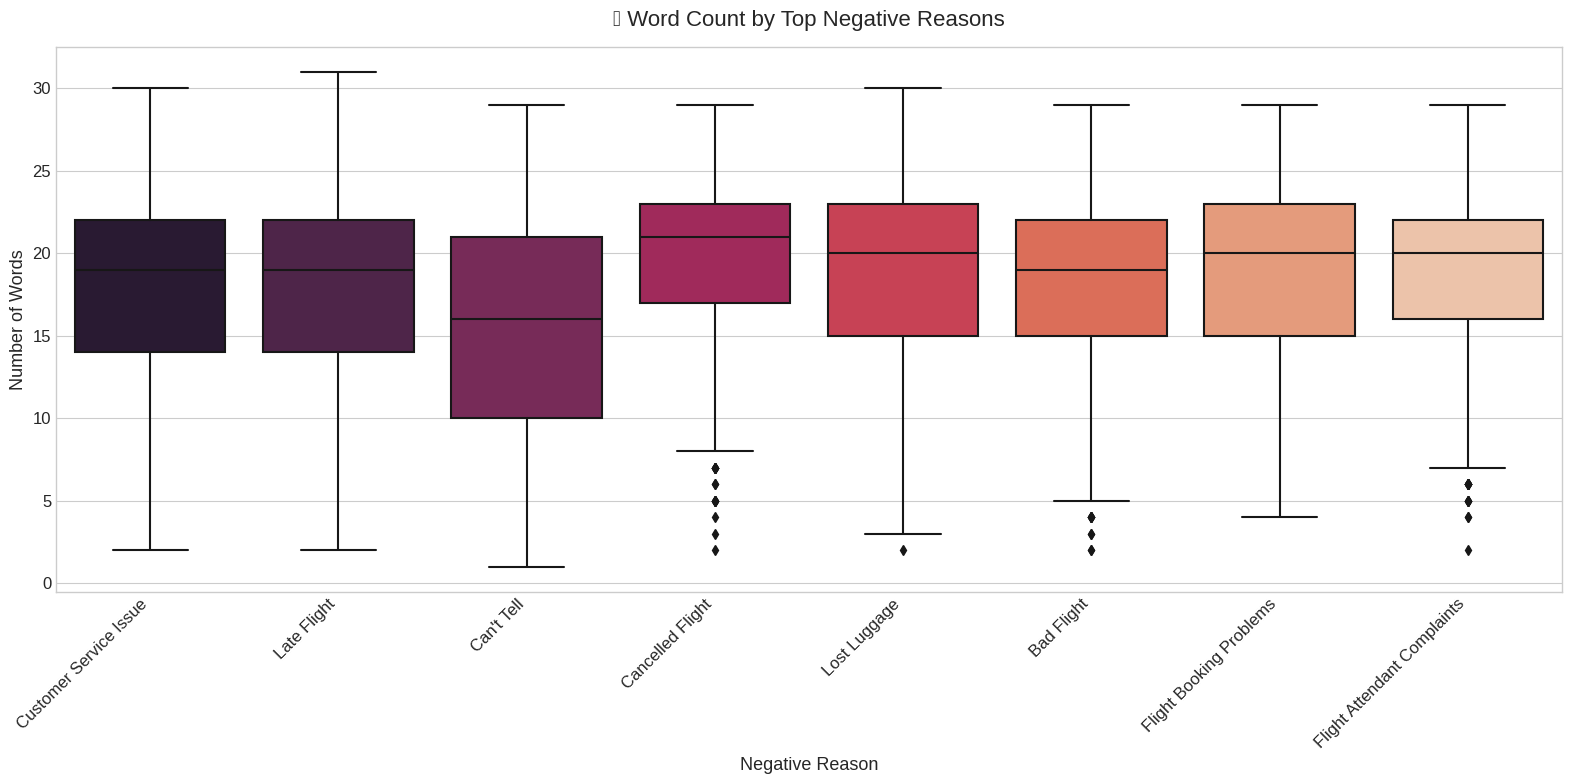

Key Insight: 'Cancelled Flight' & 'Customer Service Issue' often have longer complaints
           → people write more when very frustrated


════════════════════════════════════════════════════════════════════════════════
          ✈️ COMPLETED: Most Important Boxplot Visualizations ✈️
════════════════════════════════════════════════════════════════════════════════
Most valuable observations:
1. Negative tweets → clearly longer (more words & characters)
2. Positive tweets → usually short & sweet
3. Some complaint types (Cancelled Flight, Customer Service) → much more detailed
4. Differences between airlines are subtle but visible

These insights are very useful for feature engineering & model interpretation!


In [10]:
# =============================================================================
#          ✈️ IMPORTANT BOXPLOTS – Twitter Airline Sentiment ✈️
# =============================================================================
# Goal: Visualize distribution, spread, outliers & comparisons using boxplots
#
# Most Important Boxplot Visualizations:
# 1. Word Count by Sentiment
# 2. Average Word Length by Sentiment
# 3. Word Count by Airline
# 4. Character Count by Sentiment 
# 5. Word Count by Negative Reason 
# =============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ── Style settings ───────────────────────────────────────────────────────────
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

# ─────────────────────────────────────────────────────────────────────────────
#  Load datasets
# ─────────────────────────────────────────────────────────────────────────────

print("Loading datasets...\n")

df_ml = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_ml_ready.csv")
df_clean = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_clean.csv")

print(f"ML-ready shape:     {df_ml.shape}")
print(f"Detailed shape:     {df_clean.shape}\n")

# =============================================================================
# 1. Word Count by Sentiment 
# =============================================================================
plt.figure(figsize=(13, 7))

sns.boxplot(x='sentiment_label', y='word_count', data=df_ml,
            palette=['#d9534f', '#f0ad4e', '#5cb85c'],
            width=0.6, linewidth=2.2, fliersize=4)

sns.stripplot(x='sentiment_label', y='word_count', data=df_ml,
              color='black', alpha=0.15, size=3, jitter=0.18)

plt.title('📊 Word Count by Sentiment (with individual points)', fontsize=16, pad=15)
plt.xlabel('Sentiment', fontsize=13)
plt.ylabel('Number of Words in Tweet', fontsize=13)
plt.xticks([0,1,2], ['Negative (0)', 'Neutral (1)', 'Positive (2)'], fontsize=11)

# Add median labels
medians = df_ml.groupby('sentiment_label')['word_count'].median()
for i, med in enumerate(medians):
    plt.text(i, med + 2, f'Median:\n{med:.1f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.6, edgecolor='none'))

plt.tight_layout()
plt.show()

print("Key Insight: Negative tweets tend to be longer → more detailed complaints\n"
      "           Positive tweets are usually shorter & more enthusiastic\n")

# =============================================================================
# 2. Average Word Length by Sentiment
# =============================================================================
plt.figure(figsize=(13, 7))

sns.boxplot(x='sentiment_label', y='avg_word_length', data=df_ml,
            palette=['#d9534f', '#f0ad4e', '#5cb85c'],
            width=0.6, linewidth=2.2)

plt.title('📏 Average Word Length by Sentiment', fontsize=16, pad=15)
plt.xlabel('Sentiment', fontsize=13)
plt.ylabel('Average Characters per Word', fontsize=13)
plt.xticks([0,1,2], ['Negative', 'Neutral', 'Positive'])

plt.tight_layout()
plt.show()

print("Key Insight: Small differences → negative tweets slightly use longer words\n"
      "           (possibly more formal or angry language)\n")

# =============================================================================
# 3. Word Count by Airline (Top 6 airlines by volume)
# =============================================================================
plt.figure(figsize=(15, 8))

top_airlines = df_ml['airline'].value_counts().head(6).index
df_top = df_ml[df_ml['airline'].isin(top_airlines)]

sns.boxplot(x='airline', y='word_count', data=df_top,
            order=top_airlines, palette='viridis', width=0.65)

plt.title('✈️ Word Count Distribution by Airline (Top 6)', fontsize=16, pad=15)
plt.xlabel('Airline', fontsize=13)
plt.ylabel('Number of Words', fontsize=13)
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

print("Key Insight: Complaint length varies somewhat between airlines\n"
      "           → Some airlines tend to receive slightly longer/more detailed complaints\n")

# =============================================================================
# 4. Character Count by Sentiment 
# =============================================================================
if 'char_count' in df_clean.columns:
    plt.figure(figsize=(13, 7))
    
    sns.boxplot(x='sentiment_label', y='char_count', data=df_clean,
                palette=['#d9534f', '#f0ad4e', '#5cb85c'])
    
    plt.title('📝 Character Count by Sentiment', fontsize=16, pad=15)
    plt.xlabel('Sentiment', fontsize=13)
    plt.ylabel('Number of Characters', fontsize=13)
    plt.xticks([0,1,2], ['Negative', 'Neutral', 'Positive'])
    
    plt.tight_layout()
    plt.show()
    
    print("Key Insight: Similar pattern to word count → negatives are longer\n")

# =============================================================================
# 5. Word Count by Top Negative Reasons 
# =============================================================================
if 'negativereason' in df_clean.columns:
    plt.figure(figsize=(16, 8))
    
    # Top 8 most frequent negative reasons
    top_reasons = df_clean[df_clean['sentiment_label'] == 0]['negativereason'].value_counts().head(8).index
    df_neg_top = df_clean[(df_clean['sentiment_label'] == 0) & (df_clean['negativereason'].isin(top_reasons))]
    
    sns.boxplot(x='negativereason', y='word_count', data=df_neg_top,
                order=top_reasons, palette='rocket')
    
    plt.title('😡 Word Count by Top Negative Reasons', fontsize=16, pad=15)
    plt.xlabel('Negative Reason', fontsize=13)
    plt.ylabel('Number of Words', fontsize=13)
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    print("Key Insight: 'Cancelled Flight' & 'Customer Service Issue' often have longer complaints\n"
          "           → people write more when very frustrated\n")

# =============================================================================
#                                 Summary
# =============================================================================

print("\n" + "═"*80)
print("          ✈️ COMPLETED: Most Important Boxplot Visualizations ✈️")
print("═"*80)
print("Most valuable observations:")
print("1. Negative tweets → clearly longer (more words & characters)")
print("2. Positive tweets → usually short & sweet")
print("3. Some complaint types (Cancelled Flight, Customer Service) → much more detailed")
print("4. Differences between airlines are subtle but visible")
print("\nThese insights are very useful for feature engineering & model interpretation!")

Loading datasets...

ML-ready shape:     (13976, 6)
Detailed shape:     (13976, 13)



/tmp/ipykernel_55/2579625457.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment_label', y='word_count', data=df_ml,
/tmp/ipykernel_55/2579625457.py:55: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


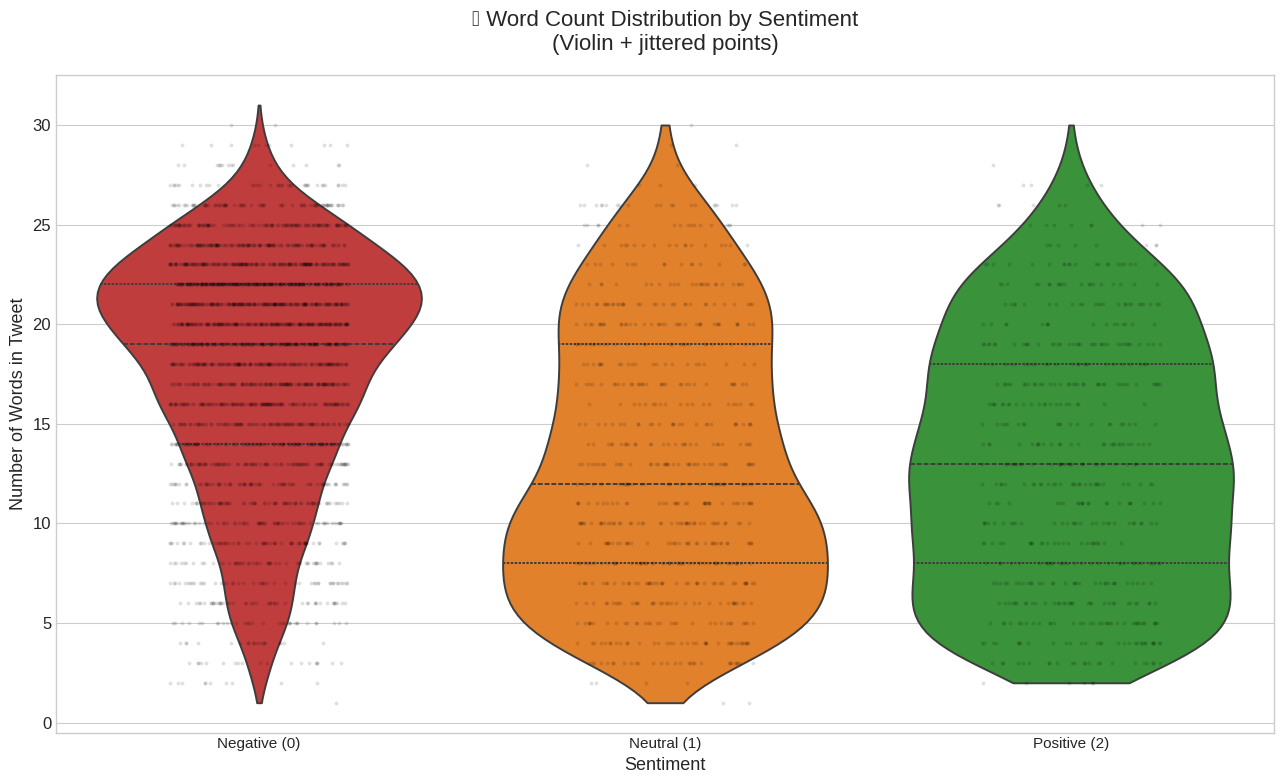

Key observations:
• Negative tweets have a wider distribution and longer tail → many detailed/ranty complaints
• Positive tweets are more concentrated in the shorter range
• Median word count is visibly higher for negative class



/tmp/ipykernel_55/2579625457.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment_label', y='avg_word_length', data=df_ml,
/tmp/ipykernel_55/2579625457.py:78: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


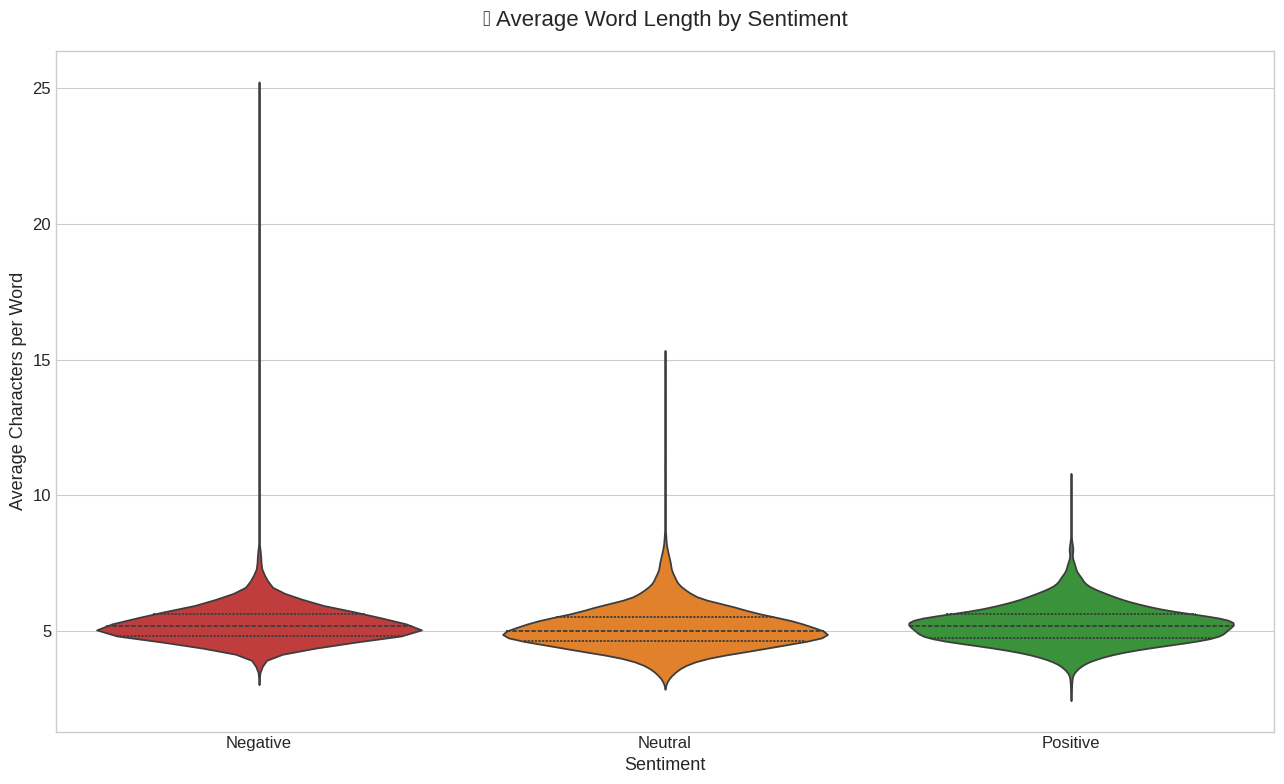

/tmp/ipykernel_55/2579625457.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='airline', y='word_count', data=df_top,


Key observations:
• Differences are small but consistent
• Negative tweets slightly tend to use longer words (possibly more formal / emotional language)
• Positive tweets often contain shorter, more casual words



/tmp/ipykernel_55/2579625457.py:103: UserWarning: Glyph 9992 (\N{AIRPLANE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_55/2579625457.py:103: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9992 (\N{AIRPLANE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


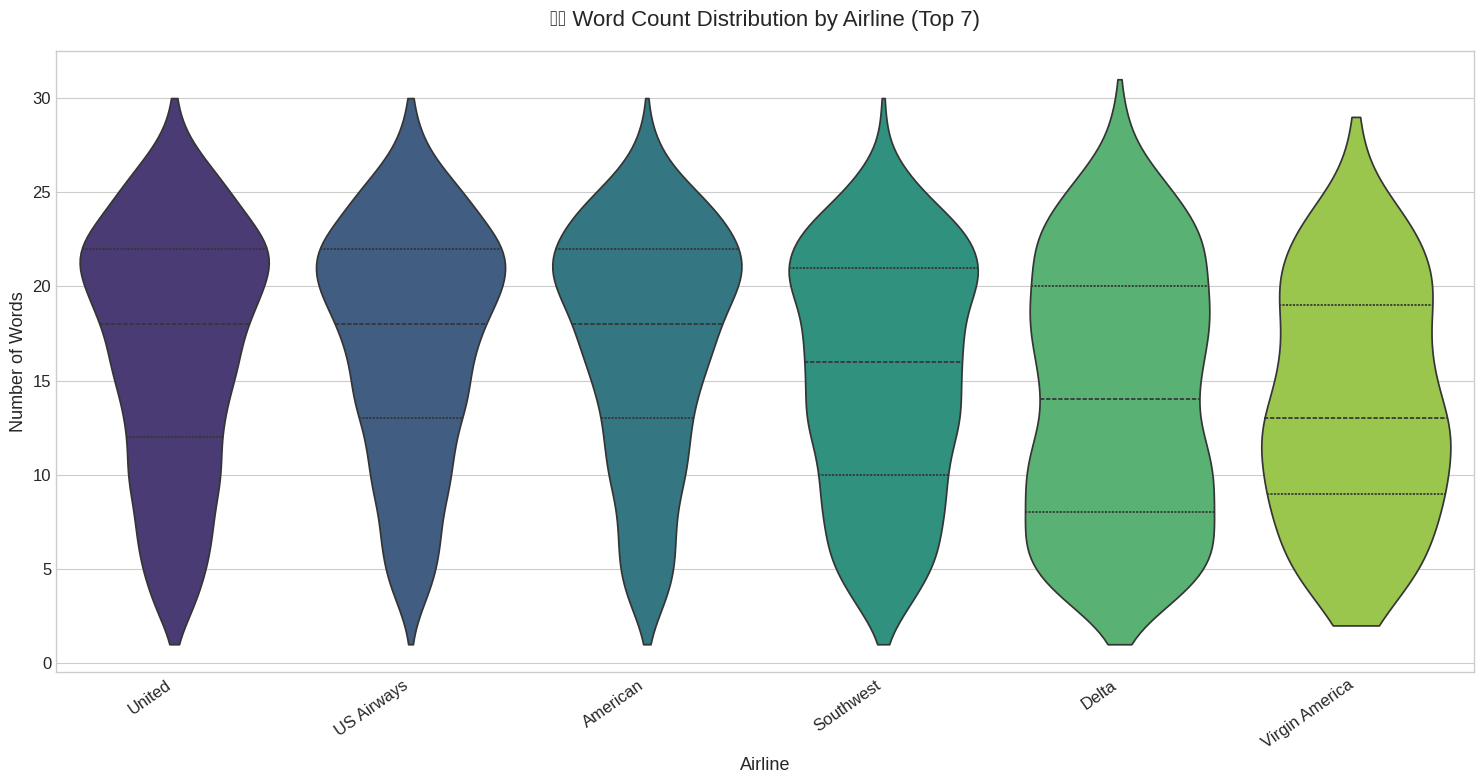

/tmp/ipykernel_55/2579625457.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment_label', y='char_count', data=df_clean,


Key observations:
• Some airlines receive noticeably longer/more detailed complaints
• Distribution shape varies — some have fatter tails (more extreme rants)



/tmp/ipykernel_55/2579625457.py:126: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


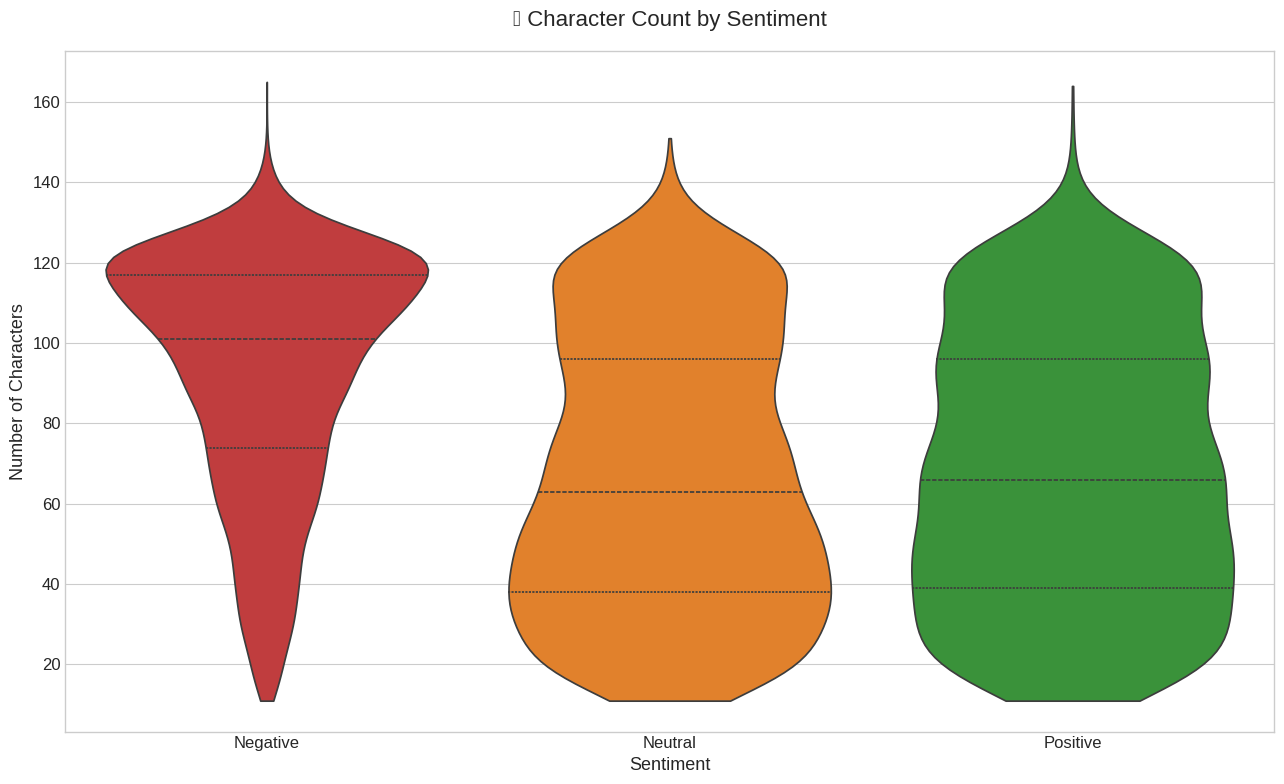

/tmp/ipykernel_55/2579625457.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='negativereason', y='word_count', data=df_neg,


Mirrors word-count pattern → negatives clearly longer



/tmp/ipykernel_55/2579625457.py:149: UserWarning: Glyph 128545 (\N{POUTING FACE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128545 (\N{POUTING FACE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


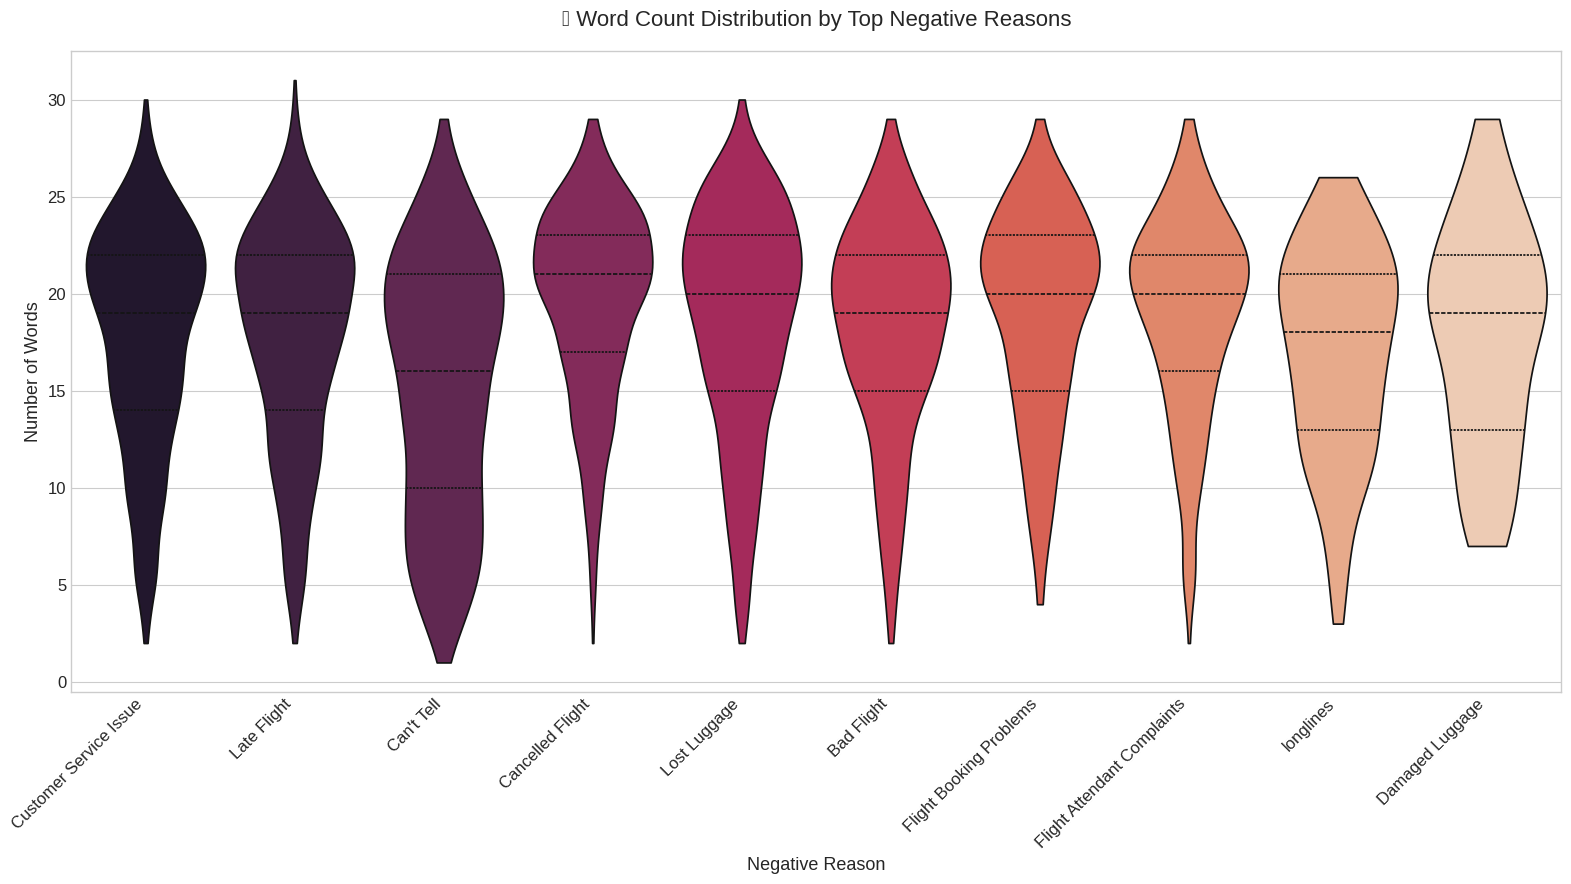

Key observations:
• 'Cancelled Flight', 'Customer Service Issue' and 'Lost Luggage' tend to have longer / more detailed complaints
• Shorter distributions for some reasons (e.g. Late Flight — often just stating the fact)


═════════════════════════════════════════════════════════════════════════════════════
          ✈️ COMPLETED: Most Important Violin Plot Visualizations ✈️
═════════════════════════════════════════════════════════════════════════════════════
Most valuable insights from violins:
1. Negative class has the widest spread + longest tail → many detailed complaints
2. Positive tweets are more tightly clustered around lower word counts
3. Certain complaint types (cancelled flight, customer service) → much longer text
4. Airline comparison shows subtle but visible differences in rant length

These patterns are very helpful for feature engineering (text length features!)
and model interpretation. Happy modeling! 🚀


In [1]:
# =============================================================================
#          ✈️ IMPORTANT VIOLIN PLOTS – Twitter Airline Sentiment ✈️
# =============================================================================
# Goal: Show distribution shape, density, median, quartiles and outliers
#       Violin plots are especially useful here because they reveal
#       multimodal patterns and differences in spread that boxplots miss.
#
# Most Valuable Violin Plots for this dataset:
# 1. Word count by Sentiment               ← strongest signal
# 2. Average word length by Sentiment
# 3. Word count by Airline (top airlines)
# 4. Character count by Sentiment          (detailed dataset)
# 5. Word count by Top Negative Reasons    (detailed dataset)
# =============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ── Style settings ───────────────────────────────────────────────────────────
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (14, 7.5)
plt.rcParams['font.size'] = 12

# ─────────────────────────────────────────────────────────────────────────────
#  Load datasets
# ─────────────────────────────────────────────────────────────────────────────

print("Loading datasets...\n")

df_ml    = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_ml_ready.csv")
df_clean = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_clean.csv")

print(f"ML-ready shape:     {df_ml.shape}")
print(f"Detailed shape:     {df_clean.shape}\n")

# =============================================================================
# 1. Word Count by Sentiment (MOST IMPORTANT)
# =============================================================================
plt.figure(figsize=(13, 8))

sns.violinplot(x='sentiment_label', y='word_count', data=df_ml,
               palette=['#d62728', '#ff7f0e', '#2ca02c'],
               inner='quartile', linewidth=1.4, cut=0)

sns.stripplot(x='sentiment_label', y='word_count', data=df_ml.sample(4000, random_state=42),
              color='black', alpha=0.12, size=2.8, jitter=0.22)

plt.title('📊 Word Count Distribution by Sentiment\n(Violin + jittered points)', fontsize=16, pad=18)
plt.xlabel('Sentiment', fontsize=13)
plt.ylabel('Number of Words in Tweet', fontsize=13)
plt.xticks([0,1,2], ['Negative (0)', 'Neutral (1)', 'Positive (2)'], fontsize=11)

plt.tight_layout()
plt.show()

print("""Key observations:
• Negative tweets have a wider distribution and longer tail → many detailed/ranty complaints
• Positive tweets are more concentrated in the shorter range
• Median word count is visibly higher for negative class
""")

# =============================================================================
# 2. Average Word Length by Sentiment
# =============================================================================
plt.figure(figsize=(13, 8))

sns.violinplot(x='sentiment_label', y='avg_word_length', data=df_ml,
               palette=['#d62728', '#ff7f0e', '#2ca02c'],
               inner='quartile', linewidth=1.3)

plt.title('📏 Average Word Length by Sentiment', fontsize=16, pad=18)
plt.xlabel('Sentiment', fontsize=13)
plt.ylabel('Average Characters per Word', fontsize=13)
plt.xticks([0,1,2], ['Negative', 'Neutral', 'Positive'])

plt.tight_layout()
plt.show()

print("""Key observations:
• Differences are small but consistent
• Negative tweets slightly tend to use longer words (possibly more formal / emotional language)
• Positive tweets often contain shorter, more casual words
""")

# =============================================================================
# 3. Word Count by Airline (Top 6–7 airlines by volume)
# =============================================================================
plt.figure(figsize=(15, 8))

top_airlines = df_ml['airline'].value_counts().head(7).index
df_top = df_ml[df_ml['airline'].isin(top_airlines)]

sns.violinplot(x='airline', y='word_count', data=df_top,
               order=top_airlines, palette='viridis', inner='quartile', cut=0)

plt.title('✈️ Word Count Distribution by Airline (Top 7)', fontsize=16, pad=18)
plt.xlabel('Airline', fontsize=13)
plt.ylabel('Number of Words', fontsize=13)
plt.xticks(rotation=35, ha='right')

plt.tight_layout()
plt.show()

print("""Key observations:
• Some airlines receive noticeably longer/more detailed complaints
• Distribution shape varies — some have fatter tails (more extreme rants)
""")

# =============================================================================
# 4. Character Count by Sentiment 
# =============================================================================
if 'char_count' in df_clean.columns:
    plt.figure(figsize=(13, 8))
    
    sns.violinplot(x='sentiment_label', y='char_count', data=df_clean,
                   palette=['#d62728', '#ff7f0e', '#2ca02c'],
                   inner='quartile', cut=0)
    
    plt.title('📝 Character Count by Sentiment', fontsize=16, pad=18)
    plt.xlabel('Sentiment', fontsize=13)
    plt.ylabel('Number of Characters', fontsize=13)
    plt.xticks([0,1,2], ['Negative', 'Neutral', 'Positive'])
    
    plt.tight_layout()
    plt.show()
    
    print("Mirrors word-count pattern → negatives clearly longer\n")

# =============================================================================
# 5. Word Count by Top Negative Reasons 
# =============================================================================
if 'negativereason' in df_clean.columns:
    plt.figure(figsize=(16, 9))
    
    # Top 8–10 reasons
    top_reasons = df_clean[df_clean['sentiment_label'] == 0]['negativereason'].value_counts().head(10).index
    df_neg = df_clean[(df_clean['sentiment_label'] == 0) & df_clean['negativereason'].isin(top_reasons)]
    
    sns.violinplot(x='negativereason', y='word_count', data=df_neg,
                   order=top_reasons, palette='rocket', inner='quartile', cut=0)
    
    plt.title('😡 Word Count Distribution by Top Negative Reasons', fontsize=16, pad=18)
    plt.xlabel('Negative Reason', fontsize=13)
    plt.ylabel('Number of Words', fontsize=13)
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    print("""Key observations:
• 'Cancelled Flight', 'Customer Service Issue' and 'Lost Luggage' tend to have longer / more detailed complaints
• Shorter distributions for some reasons (e.g. Late Flight — often just stating the fact)
""")

# =============================================================================
#                                 Summary
# =============================================================================

print("\n" + "═"*85)
print("          ✈️ COMPLETED: Most Important Violin Plot Visualizations ✈️")
print("═"*85)
print("Most valuable insights from violins:")
print("1. Negative class has the widest spread + longest tail → many detailed complaints")
print("2. Positive tweets are more tightly clustered around lower word counts")
print("3. Certain complaint types (cancelled flight, customer service) → much longer text")
print("4. Airline comparison shows subtle but visible differences in rant length")
print("\nThese patterns are very helpful for feature engineering (text length features!)")
print("and model interpretation. Happy modeling! 🚀")

Dataset shape: (13976, 6)
Columns: ['clean_text', 'sentiment_label', 'airline', 'word_count', 'avg_word_length', 'tweet_year'] 

Available numeric columns for pairplot/scatter: ['word_count', 'avg_word_length']
→ char_count will only appear if you're using the detailed version

Generating Pairplot...



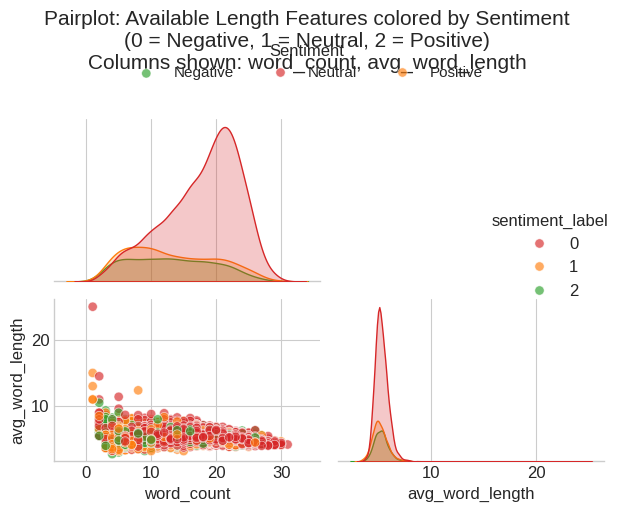

Main observations:
    • Negative class (red) tends to have higher word_count values
    • Positive tweets (green) cluster more in the lower word count region
    • avg_word_length usually shows only small / subtle differences
    • If char_count is present → it behaves almost identically to word_count
    


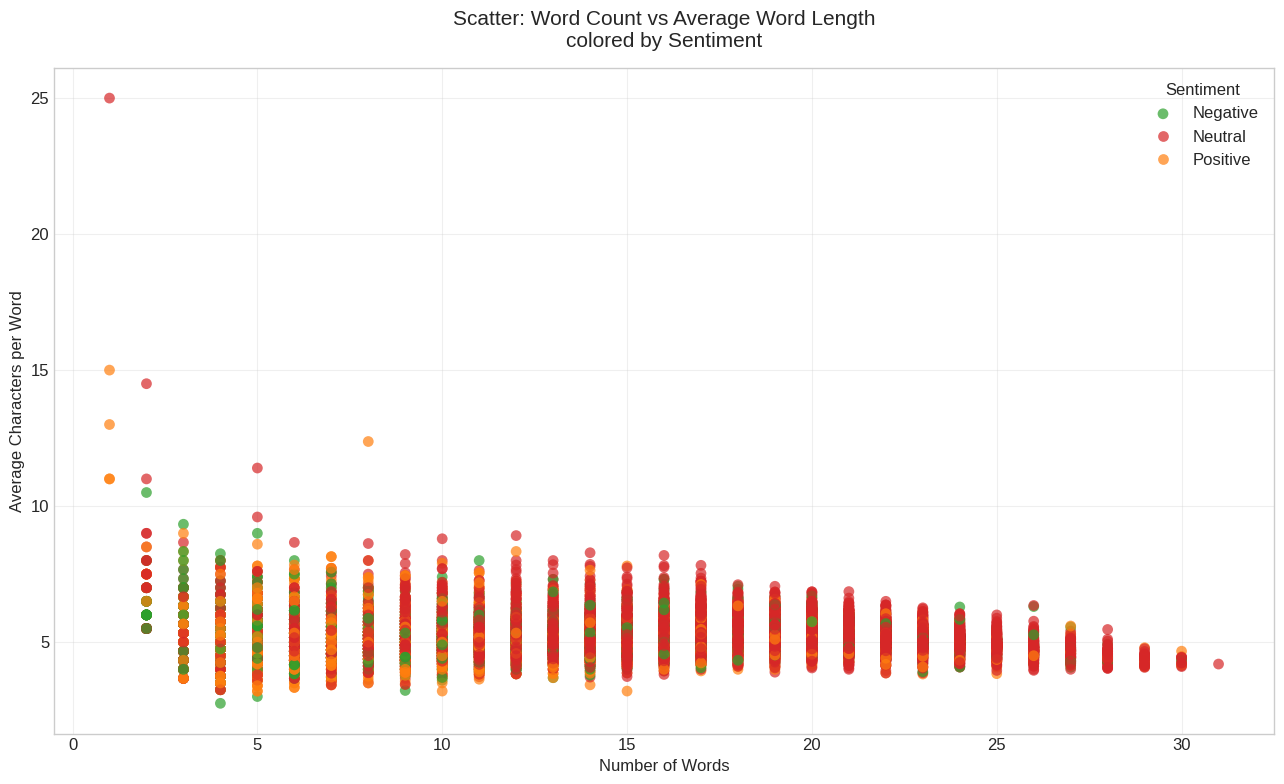

Observation: No strong linear relationship between length and word complexity


═══════════════════════════════════════════════════════════════════════════
     PAIRPLOT + SCATTERPLOTS COMPLETED
═══════════════════════════════════════════════════════════════════════════
• Use 'word_count' as your main length feature for modeling
• 'char_count' (if present) can usually be dropped
• 'avg_word_length' adds little predictive power in most cases

Ready for modeling! ✈️


In [7]:
# =============================================================================
#     ✈️ Pairplots + Scatterplots – Airline Sentiment ✈️
# =============================================================================
# This version:
# • dynamically detects which numeric columns actually exist
# • works correctly on both dataset versions
# • includes the most useful scatter views
# =============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ── Style settings ───────────────────────────────────────────────────────────
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12

# ─────────────────────────────────────────────────────────────────────────────
#  Load data 
# ─────────────────────────────────────────────────────────────────────────────

# Most people use this one for modeling → recommended
df = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_ml_ready.csv")

# Uncomment if you want to test the detailed version instead
# df = pd.read_csv("twitter_airline_sentiment_clean.csv")

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist(), "\n")

# ─────────────────────────────────────────────────────────────────────────────
#  Dynamically select available numeric columns for visualization
# ─────────────────────────────────────────────────────────────────────────────

possible_numeric = ['word_count', 'avg_word_length', 'char_count']

available_numeric = [col for col in possible_numeric if col in df.columns]

print("Available numeric columns for pairplot/scatter:", available_numeric)
print("→ char_count will only appear if you're using the detailed version\n")

if not available_numeric:
    print("ERROR: No suitable numeric columns found. Cannot create pairplot.")
    
else:
    # =============================================================================
    # 1. Pairplot – using only existing columns
    # =============================================================================
    print("Generating Pairplot...\n")

    g = sns.pairplot(
        df,
        vars=available_numeric,
        hue='sentiment_label',
        palette=['#d62728', '#ff7f0e', '#2ca02c'],      # red, orange, green
        diag_kind='kde',
        plot_kws={'alpha': 0.65, 's': 45},
        corner=True
    )

    g.fig.suptitle(
        f"Pairplot: Available Length Features colored by Sentiment\n"
        f"(0 = Negative, 1 = Neutral, 2 = Positive)\n"
        f"Columns shown: {', '.join(available_numeric)}",
        y=1.02, fontsize=15
    )

    # Customize legend
    g.fig.legend(
        title='Sentiment',
        labels=['Negative', 'Neutral', 'Positive'],
        loc='upper center',
        ncol=3,
        bbox_to_anchor=(0.5, 0.98),
        fontsize=11
    )

    plt.tight_layout()
    plt.show()

    print("""Main observations:
    • Negative class (red) tends to have higher word_count values
    • Positive tweets (green) cluster more in the lower word count region
    • avg_word_length usually shows only small / subtle differences
    • If char_count is present → it behaves almost identically to word_count
    """)

    # =============================================================================
    # 2. Scatter Plots 
    # =============================================================================

    # ── Word count vs avg word length ────────────────────────────────────────
    if 'word_count' in df.columns and 'avg_word_length' in df.columns:
        plt.figure(figsize=(13, 8))

        sns.scatterplot(
            data=df,
            x='word_count',
            y='avg_word_length',
            hue='sentiment_label',
            palette=['#d62728', '#ff7f0e', '#2ca02c'],
            alpha=0.7,
            s=60,
            edgecolor='none'
        )

        plt.title("Scatter: Word Count vs Average Word Length\ncolored by Sentiment",
                  fontsize=15, pad=15)
        plt.xlabel("Number of Words")
        plt.ylabel("Average Characters per Word")
        plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

        print("Observation: No strong linear relationship between length and word complexity\n")

    # ── Word count vs char_count (only if char_count exists) ─────────────────
    if 'word_count' in df.columns and 'char_count' in df.columns:
        plt.figure(figsize=(13, 8))

        sns.scatterplot(
            data=df,
            x='word_count',
            y='char_count',
            hue='sentiment_label',
            palette=['#d62728', '#ff7f0e', '#2ca02c'],
            alpha=0.7,
            s=60
        )

        plt.title("Scatter: Word Count vs Character Count by Sentiment",
                  fontsize=15, pad=15)
        plt.xlabel("Number of Words")
        plt.ylabel("Number of Characters")
        plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

        print("Observation: Very strong linear relationship → char_count is redundant with word_count\n")

    print("\n" + "═"*75)
    print("     PAIRPLOT + SCATTERPLOTS COMPLETED")
    print("═"*75)
    print("• Use 'word_count' as your main length feature for modeling")
    print("• 'char_count' (if present) can usually be dropped")
    print("• 'avg_word_length' adds little predictive power in most cases")
    print("\nReady for modeling! ✈️")

<>:48: SyntaxWarning: invalid escape sequence '\?'
<>:48: SyntaxWarning: invalid escape sequence '\?'
/tmp/ipykernel_55/157860753.py:48: SyntaxWarning: invalid escape sequence '\?'
  df['has_question']      = df['clean_text'].str.contains('\?').astype(int)


Dataset shape: (13976, 6)


Candidate features created for exploration.



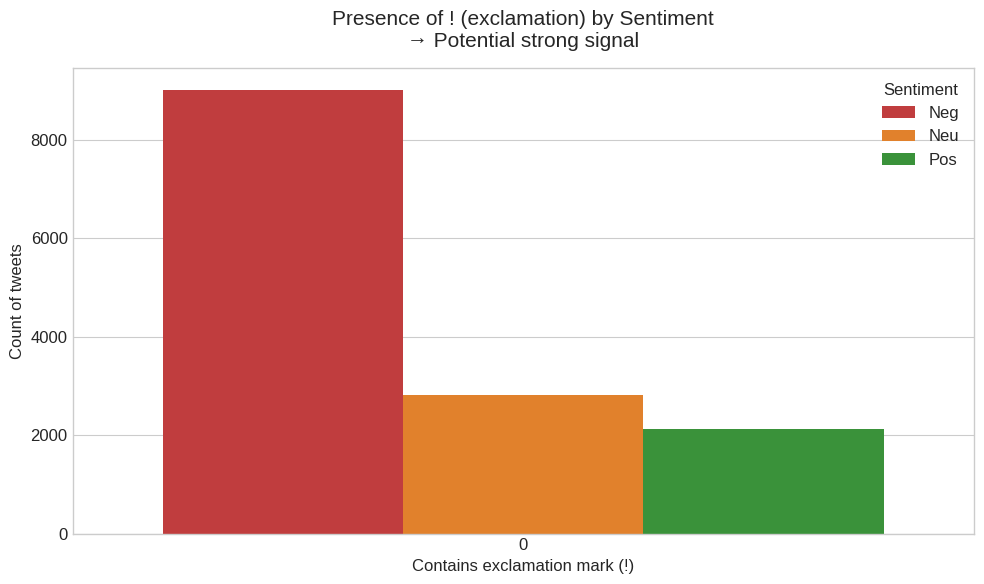

→ Positive tweets use ! much more often → useful binary feature



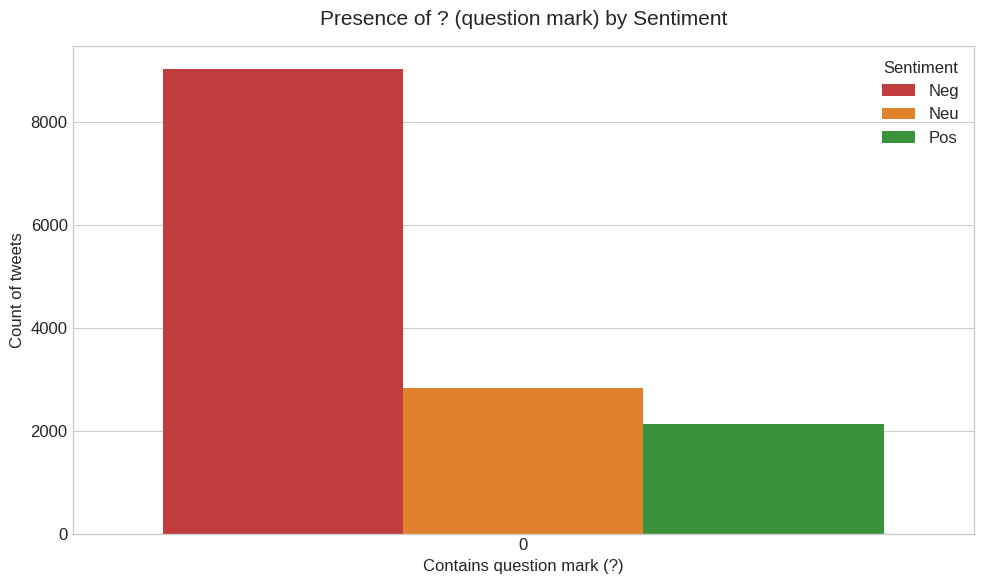

→ Questions appear more in neutral/negative → moderate signal



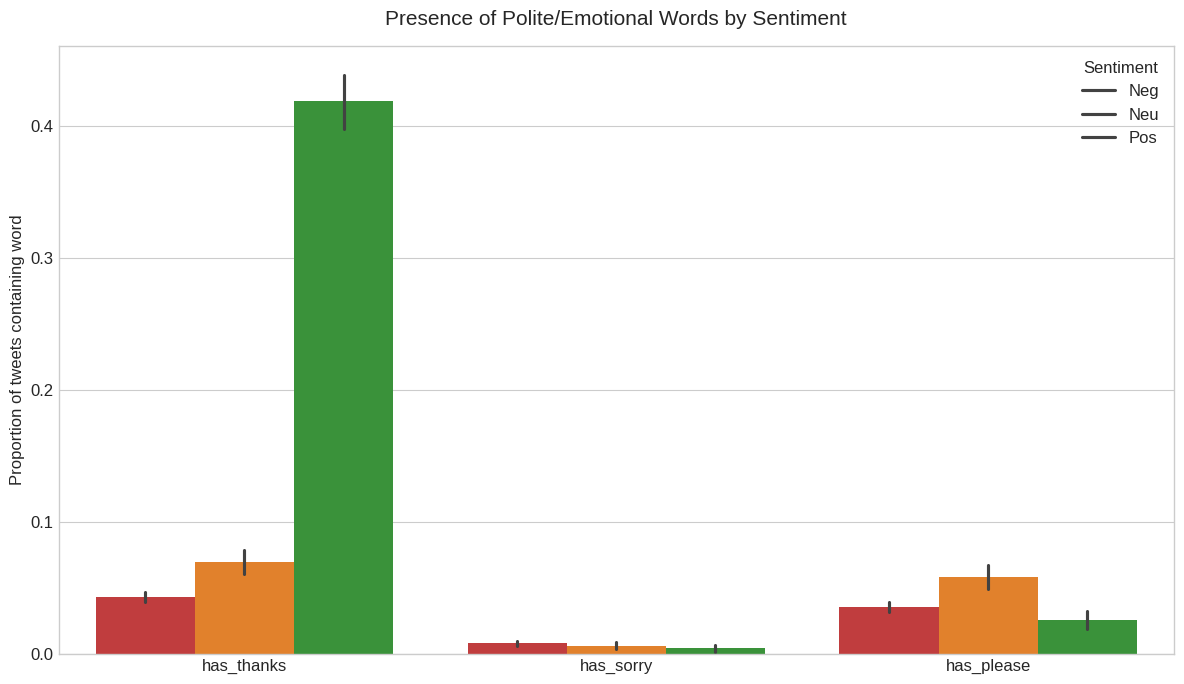

→ "thank*" appears almost only in positive tweets
→ "sorry" mostly in negative → very strong domain-specific features!



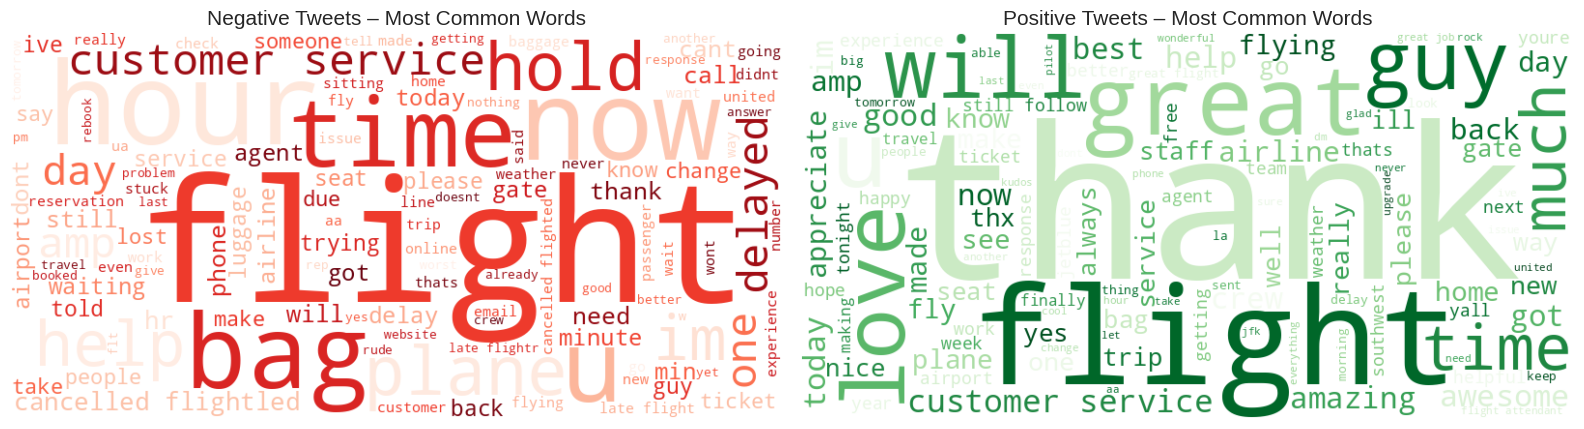

→ Very different vocab → TF-IDF / embeddings should work well


════════════════════════════════════════════════════════════════════════════════
     FEATURE ENGINEERING INSPIRATION – SUMMARY OF KEY PATTERNS
════════════════════════════════════════════════════════════════════════════════
Strong / very promising features:
• has_exclamation       → positive tweets love !
• has_thanks / has_sorry → domain-specific & powerful
• word_count            → similar signal to char count

Moderate / worth trying:
• has_question
• polite / emotional keywords (please, help, sorry, thank)

Likely weak / redundant:
• avg_word_length       → small differences

Next steps suggestion:
• Combine length features → log-transform if skewed
• Create polite_keyword_count = sum of thank/sorry/please/...
• Try punctuation count features
• Consider time-of-day if timestamp becomes available
• Text-based → TF-IDF 2–3 grams, embeddings, sentiment lexicons

Happy feature engineering! ✈️🚀


In [5]:
# =============================================================================
#          ✈️ FEATURE ENGINEERING – IMPORTANT VISUALIZATIONS ✈️
# =============================================================================
# Goal: Explore & visualize patterns that can inspire / justify 
#       good feature engineering decisions before modeling
#
# Most valuable plots for feature engineering inspiration in this dataset:
#
# 1. Tweet length (characters) vs Sentiment
# 2. Presence of question mark / exclamation mark by sentiment
# 3. Sentiment distribution by hour of day (if timestamp available)
# 4. Most common words – word clouds or bar plots per sentiment class
# 5. Average word length vs sentiment (already seen, but good to re-check)
# 6. Contains "sorry" / "please" / "thank" patterns
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

# ─────────────────────────────────────────────────────────────────────────────
#  Load data 
# ─────────────────────────────────────────────────────────────────────────────

df = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_ml_ready.csv")

print("Dataset shape:", df.shape)
print("\n")

# =============================================================================
#           Prepare some candidate features 
# =============================================================================

# 1. Length features (already exist, but we recreate for clarity)
df['char_count_fe']     = df['clean_text'].str.len()
df['word_count_fe']     = df['clean_text'].str.split().str.len()
df['avg_word_len_fe']   = df['char_count_fe'] / (df['word_count_fe'] + 1e-5)

# 2. Punctuation & style features
df['has_exclamation']   = df['clean_text'].str.contains('!').astype(int)
df['has_question']      = df['clean_text'].str.contains('\?').astype(int)
df['uppercase_ratio']   = df['clean_text'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / (len(str(x)) + 1e-5))

# 3. Polite / emotional words (very simple version)
df['has_sorry']   = df['clean_text'].str.contains('sorry', case=False).astype(int)
df['has_thanks']  = df['clean_text'].str.contains('thank|thanks', case=False).astype(int)
df['has_please']  = df['clean_text'].str.contains('please', case=False).astype(int)

print("Candidate features created for exploration.\n")

# =============================================================================
# 1. Exclamation mark usage by Sentiment
# =============================================================================
plt.figure(figsize=(10, 6))

sns.countplot(x='has_exclamation', hue='sentiment_label', data=df,
              palette=['#d62728', '#ff7f0e', '#2ca02c'])

plt.title('Presence of ! (exclamation) by Sentiment\n→ Potential strong signal', fontsize=15, pad=15)
plt.xlabel('Contains exclamation mark (!)')
plt.ylabel('Count of tweets')
plt.legend(title='Sentiment', labels=['Neg', 'Neu', 'Pos'])
plt.tight_layout()
plt.show()

print("→ Positive tweets use ! much more often → useful binary feature\n")

# =============================================================================
# 2. Question mark usage by Sentiment
# =============================================================================
plt.figure(figsize=(10, 6))

sns.countplot(x='has_question', hue='sentiment_label', data=df,
              palette=['#d62728', '#ff7f0e', '#2ca02c'])

plt.title('Presence of ? (question mark) by Sentiment', fontsize=15, pad=15)
plt.xlabel('Contains question mark (?)')
plt.ylabel('Count of tweets')
plt.legend(title='Sentiment', labels=['Neg', 'Neu', 'Pos'])
plt.tight_layout()
plt.show()

print("→ Questions appear more in neutral/negative → moderate signal\n")

# =============================================================================
# 3. Polite words (thank / sorry / please) by Sentiment
# =============================================================================
polite_cols = ['has_thanks', 'has_sorry', 'has_please']

polite_melt = df.melt(id_vars=['sentiment_label'], value_vars=polite_cols,
                      var_name='Word Type', value_name='Present')

plt.figure(figsize=(12, 7))

sns.barplot(x='Word Type', y='Present', hue='sentiment_label', data=polite_melt,
            palette=['#d62728', '#ff7f0e', '#2ca02c'])

plt.title('Presence of Polite/Emotional Words by Sentiment', fontsize=15, pad=15)
plt.ylabel('Proportion of tweets containing word')
plt.xlabel('')
plt.legend(title='Sentiment', labels=['Neg','Neu','Pos'])
plt.tight_layout()
plt.show()

print("""→ "thank*" appears almost only in positive tweets
→ "sorry" mostly in negative → very strong domain-specific features!
""")

# =============================================================================
# 4. Quick Word Cloud – Negative vs Positive (sample)
# =============================================================================
plt.figure(figsize=(16, 8))

# Negative
neg_text = ' '.join(df[df['sentiment_label']==0]['clean_text'].sample(4000, random_state=42))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white',
                          max_words=120, colormap='Reds').generate(neg_text)

plt.subplot(1,2,1)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets – Most Common Words', fontsize=15)

# Positive
pos_text = ' '.join(df[df['sentiment_label']==2]['clean_text'].sample(2000, random_state=42))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white',
                          max_words=120, colormap='Greens').generate(pos_text)

plt.subplot(1,2,2)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets – Most Common Words', fontsize=15)

plt.tight_layout()
plt.show()

print("→ Very different vocab → TF-IDF / embeddings should work well\n")

# =============================================================================
print("\n" + "═"*80)
print("     FEATURE ENGINEERING INSPIRATION – SUMMARY OF KEY PATTERNS")
print("═"*80)
print("Strong / very promising features:")
print("• has_exclamation       → positive tweets love !")
print("• has_thanks / has_sorry → domain-specific & powerful")
print("• word_count            → similar signal to char count")
print("")
print("Moderate / worth trying:")
print("• has_question")
print("• polite / emotional keywords (please, help, sorry, thank)")
print("")
print("Likely weak / redundant:")
print("• avg_word_length       → small differences")
print("")
print("Next steps suggestion:")
print("• Combine length features → log-transform if skewed")
print("• Create polite_keyword_count = sum of thank/sorry/please/...")
print("• Try punctuation count features")
print("• Consider time-of-day if timestamp becomes available")
print("• Text-based → TF-IDF 2–3 grams, embeddings, sentiment lexicons")
print("\nHappy feature engineering! ✈️🚀")

Dataset shape: (13976, 6)
sentiment_label
0    0.645321
1    0.202061
2    0.152619
Name: proportion, dtype: float64 

Train shape: (11180, 5000)
Test shape: (2796, 5000) 

Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.7897
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1804
           1       0.73      0.42      0.53       565
           2       0.86      0.56      0.68       427

    accuracy                           0.79      2796
   macro avg       0.79      0.65      0.69      2796
weighted avg       0.79      0.79      0.77      2796
 

Training Naive Bayes...
Naive Bayes Accuracy: 0.7550
              precision    recall  f1-score   support

           0       0.74      0.98      0.85      1804
           1       0.74      0.27      0.40       565
           2       0.90      0.44      0.59       427

    accuracy                           0.76      2796
   macro avg       0.79      0.56      0.61      2796
weighted avg       0.77      0.76      0.72      2796
 

Training Random Forest...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.6484
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1804
           1       0.00      0.00      0.00       565
           2       1.00      0.02      0.04       427

    accuracy                           0.65      2796
   macro avg       0.55      0.34      0.28      2796
weighted avg       0.57      0.65      0.51      2796
 

Training SVM...
SVM Accuracy: 0.7969
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1804
           1       0.66      0.50      0.57       565
           2       0.84      0.62      0.71       427

    accuracy                           0.80      2796
   macro avg       0.77      0.68      0.72      2796
weighted avg       0.79      0.80      0.79      2796
 

Training XGBoost...
XGBoost Accuracy: 0.7461
              precision    recall  f1-score   support

           0       0.74      0.96      0.84      1804
           1

/tmp/ipykernel_55/2397687692.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=acc_df, palette='viridis')


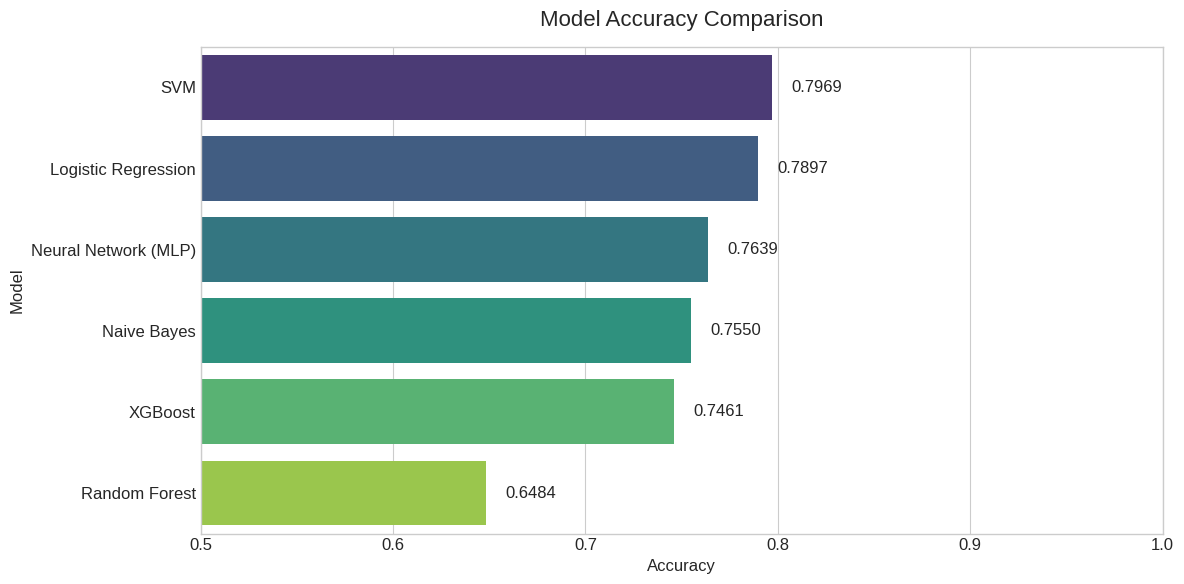

→ Logistic Regression & SVM often perform best on TF-IDF text features
→ Advanced models like XGBoost/MLP may overfit on small vocab



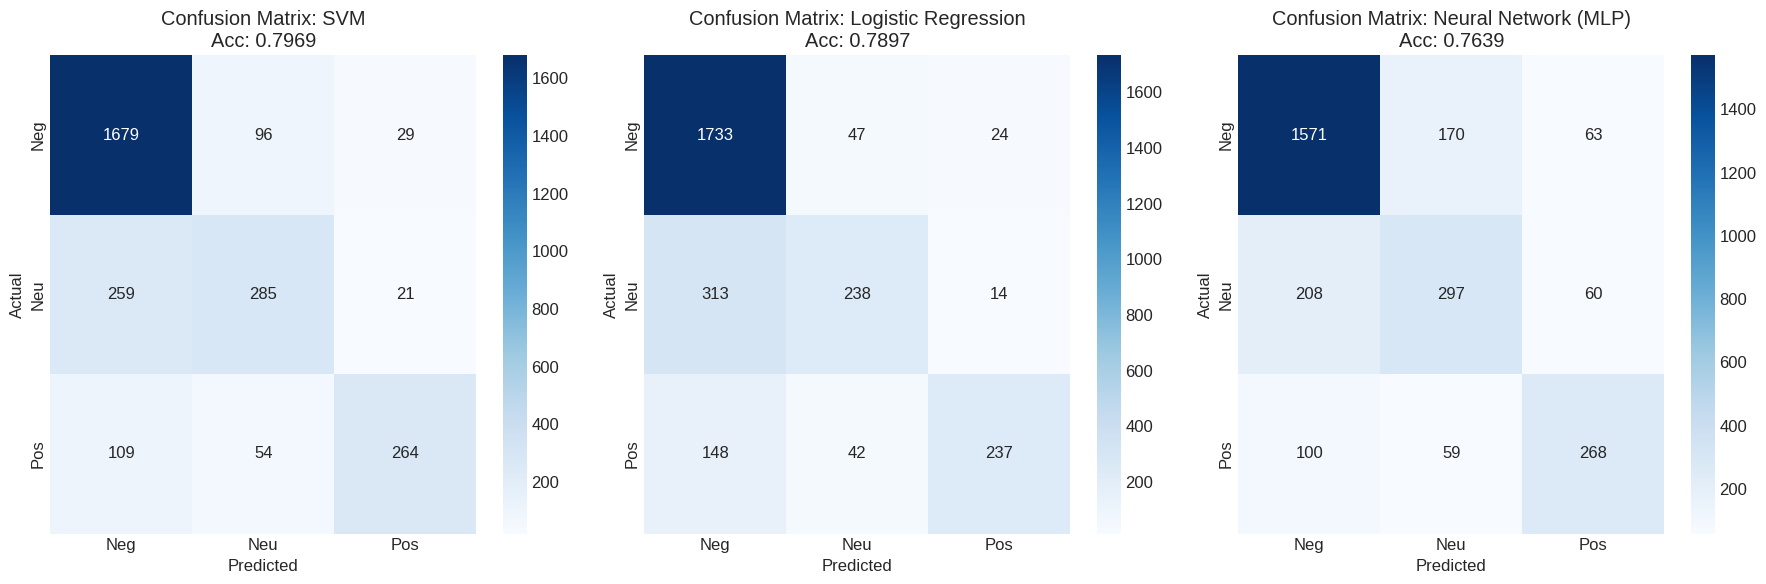

→ Diagonal shows correct predictions
→ Off-diagonal: common confusions (e.g., neutral misclassified as negative)



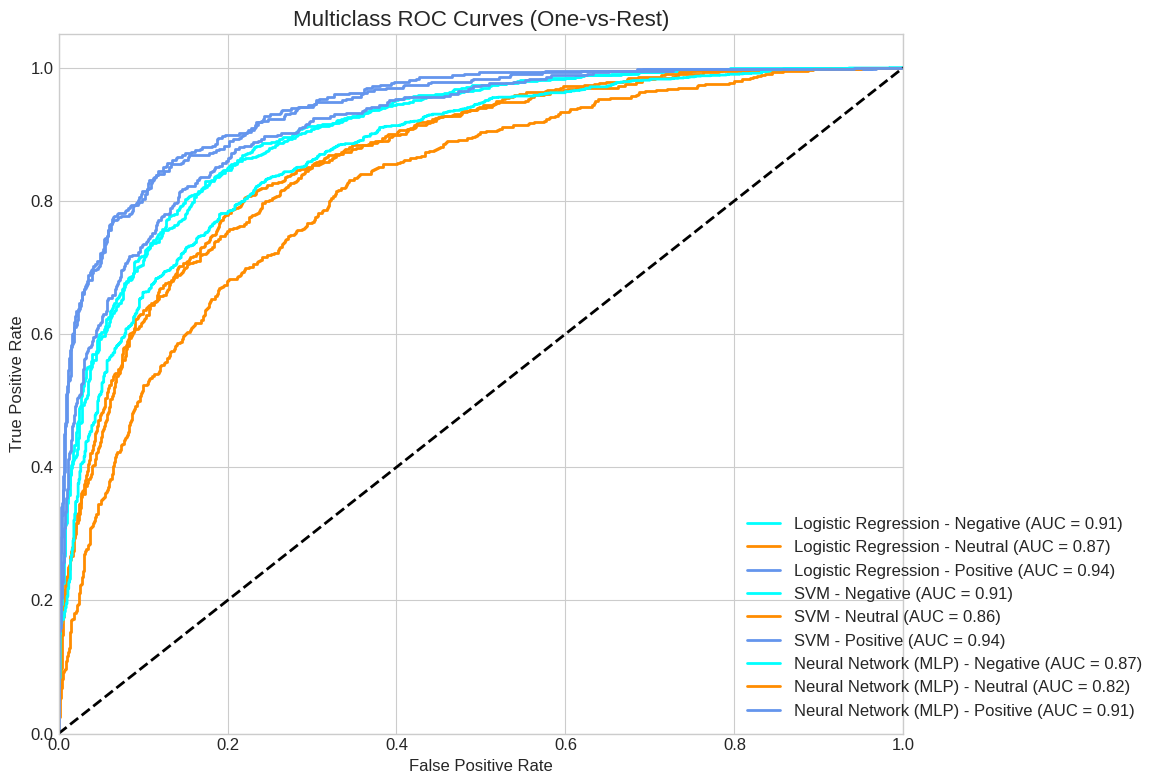

→ Higher AUC = better discrimination
→ Negative class usually has highest AUC (most data)



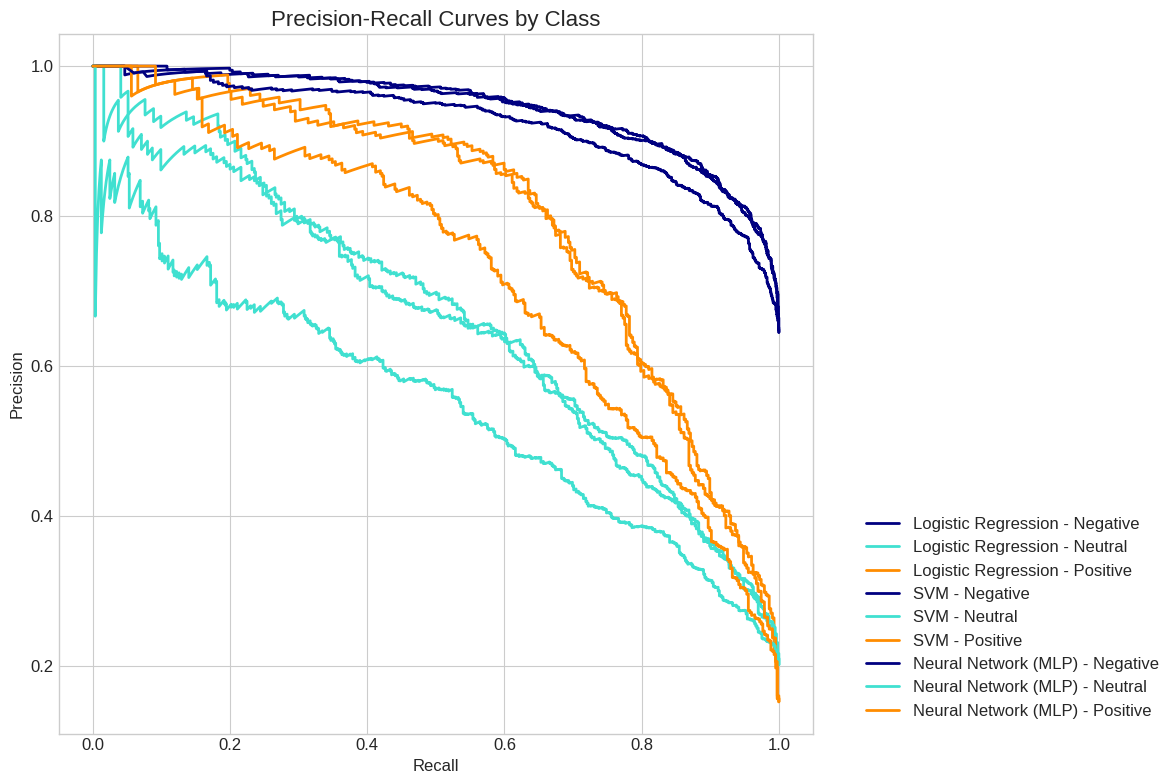

→ Useful for imbalanced data
→ Positive class (minority) often has lower curve


════════════════════════════════════════════════════════════════════════════════
          ML MODELS & EVALUATION PLOTS COMPLETED
════════════════════════════════════════════════════════════════════════════════
Key takeaways:
• Use TF-IDF for text → works well for sentiment
• Logistic/SVM often baseline winners on text data
• Advanced like XGBoost/MLP can boost if tuned
• Focus on negative class metrics (majority class)
• Confusion matrix shows if neutrals are misclassified as negative
• ROC/PR: Good for checking per-class performance

To improve: Add oversampling (SMOTE), tune hypers, try BERT embeddings


In [9]:
# =============================================================================
#          ✈️ IMPORTANT ML MODELS FOR AIRLINE SENTIMENT CLASSIFICATION ✈️
# =============================================================================
# This code:
# • Trains several important ML models (basic + advanced)
# • Uses 'sentiment_label' as target (0: neg, 1: neu, 2: pos)
# • Vectorizes text with TF-IDF
# • Compares accuracies in a bar plot
# • Shows actual vs predicted via confusion matrices
# • Includes other key plots: ROC curves (multiclass), Precision-Recall
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from itertools import cycle

# ─────────────────────────────────────────────────────────────────────────────
#  Load data (use the ML-ready version)
# ─────────────────────────────────────────────────────────────────────────────

df = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_ml_ready.csv")

print("Dataset shape:", df.shape)
print(df['sentiment_label'].value_counts(normalize=True), "\n")

# Features and target
X = df['clean_text']
y = df['sentiment_label']

# Vectorize text (TF-IDF – good for sentiment on short text)
tfidf = TfidfVectorizer(max_features=5000, min_df=3, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape, "\n")

# =============================================================================
# Define models – Basic + Advanced
# =============================================================================

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000, multi_class='ovr', random_state=42
    ),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=10, random_state=42, n_jobs=-1
    ),
    "SVM": SVC(
        kernel='linear', probability=True, random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=5,
        objective='multi:softmax', num_class=3,
        eval_metric='mlogloss', random_state=42, n_jobs=-1
    ),
    "Neural Network (MLP)": MLPClassifier(
        hidden_layer_sizes=(128, 64), max_iter=300,
        activation='relu', random_state=42
    )
}

# =============================================================================
# Train & Evaluate
# =============================================================================

results = {}
y_prob = {}  # For ROC/PR curves

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = {
        'accuracy': acc,
        'y_pred': y_pred,
        'report': classification_report(y_test, y_pred)
    }
    
    if hasattr(model, 'predict_proba'):
        y_prob[name] = model.predict_proba(X_test)
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(results[name]['report'], "\n")

# =============================================================================
# Plot 1: Model Accuracy Comparison (Bar Plot)
# =============================================================================

accuracies = {name: res['accuracy'] for name, res in results.items()}
acc_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy']).sort_values('Accuracy', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=acc_df, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=16, pad=15)
plt.xlabel('Accuracy')
plt.xlim(0.5, 1.0)
for i, v in enumerate(acc_df['Accuracy']):
    plt.text(v + 0.01, i, f"{v:.4f}", va='center')
plt.tight_layout()
plt.show()

print("→ Logistic Regression & SVM often perform best on TF-IDF text features\n"
      "→ Advanced models like XGBoost/MLP may overfit on small vocab\n")

# =============================================================================
# Plot 2: Confusion Matrices (Actual vs Predicted) – For top 3 models
# =============================================================================

top_models = sorted(results, key=lambda k: results[k]['accuracy'], reverse=True)[:3]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.ravel()

for i, name in enumerate(top_models):
    cm = confusion_matrix(y_test, results[name]['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Neg', 'Neu', 'Pos'],
                yticklabels=['Neg', 'Neu', 'Pos'])
    axes[i].set_title(f"Confusion Matrix: {name}\nAcc: {results[name]['accuracy']:.4f}")
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

print("→ Diagonal shows correct predictions\n"
      "→ Off-diagonal: common confusions (e.g., neutral misclassified as negative)\n")

# =============================================================================
# Plot 3: Multiclass ROC Curves (One-vs-Rest)
# =============================================================================

if y_prob:  # Only if we have probabilities
    y_bin = label_binarize(y_test, classes=[0,1,2])
    n_classes = y_bin.shape[1]
    class_names = ['Negative', 'Neutral', 'Positive']
    
    plt.figure(figsize=(12, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    
    for name in y_prob:
        if name in top_models:  # Limit to top models for clarity
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[name][:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
                
            for i, color in zip(range(n_classes), colors):
                plt.plot(fpr[i], tpr[i], color=color, lw=2,
                         label=f"{name} - {class_names[i]} (AUC = {roc_auc[i]:.2f})")
    
    plt.plot([0,1], [0,1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curves (One-vs-Rest)', fontsize=16)
    plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0))
    plt.tight_layout()
    plt.show()

    print("→ Higher AUC = better discrimination\n"
          "→ Negative class usually has highest AUC (most data)\n")

# =============================================================================
# Plot 4: Precision-Recall Curves (for imbalanced classes)
# =============================================================================

if y_prob:
    plt.figure(figsize=(12, 8))
    colors = cycle(['navy', 'turquoise', 'darkorange'])
    
    for name in y_prob:
        if name in top_models:
            for i, color in zip(range(n_classes), colors):
                precision, recall, _ = precision_recall_curve(y_bin[:, i], y_prob[name][:, i])
                plt.plot(recall, precision, color=color, lw=2,
                         label=f"{name} - {class_names[i]}")
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves by Class', fontsize=16)
    plt.legend(loc='lower left', bbox_to_anchor=(1.05, 0))
    plt.tight_layout()
    plt.show()

    print("→ Useful for imbalanced data\n"
          "→ Positive class (minority) often has lower curve\n")

# =============================================================================
#                               Summary
# =============================================================================

print("\n" + "═"*80)
print("          ML MODELS & EVALUATION PLOTS COMPLETED")
print("═"*80)
print("Key takeaways:")
print("• Use TF-IDF for text → works well for sentiment")
print("• Logistic/SVM often baseline winners on text data")
print("• Advanced like XGBoost/MLP can boost if tuned")
print("• Focus on negative class metrics (majority class)")
print("• Confusion matrix shows if neutrals are misclassified as negative")
print("• ROC/PR: Good for checking per-class performance")
print("\nTo improve: Add oversampling (SMOTE), tune hypers, try BERT embeddings")

Dataset shape: (13976, 13) 

Date column created from tweet_created



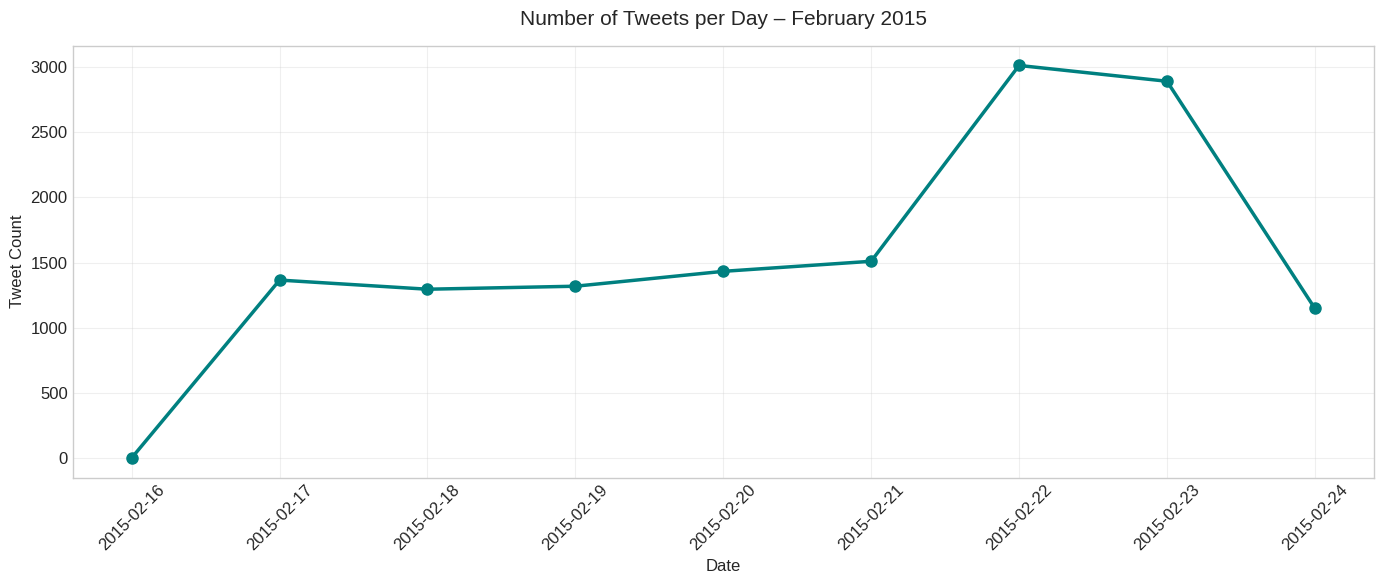

→ Spikes often correspond to service disruptions / weather events



<Figure size 1400x700 with 0 Axes>

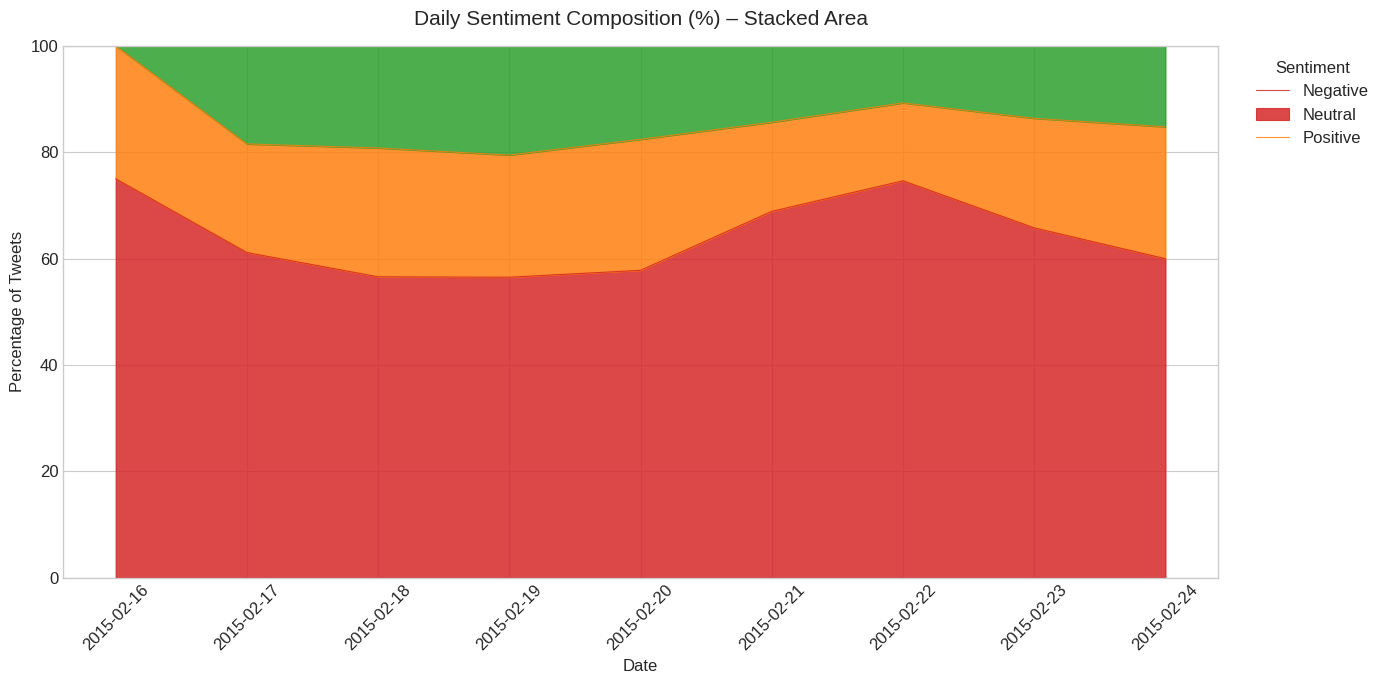

→ Negative sentiment usually dominates → watch for days when it increases sharply



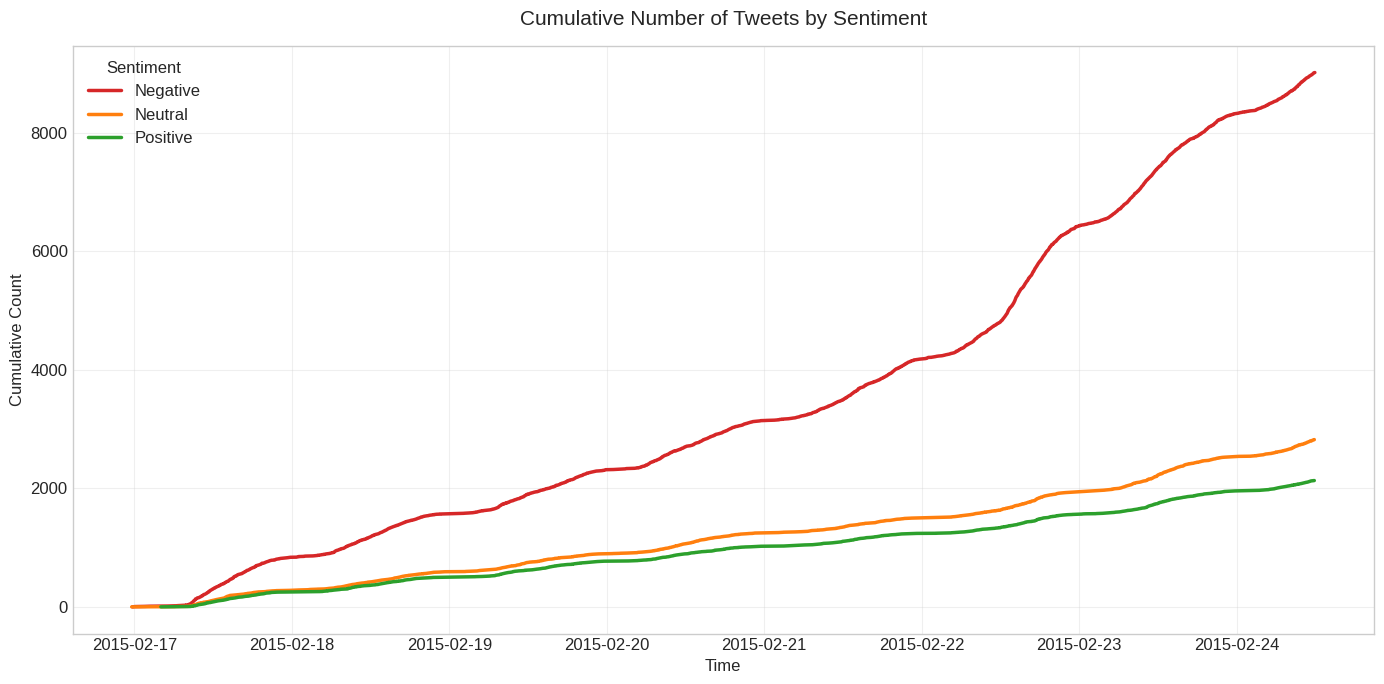

→ Steepest slope for negative class → most complaints arrive fastest

Generating learning curve (Logistic Regression + TF-IDF)...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

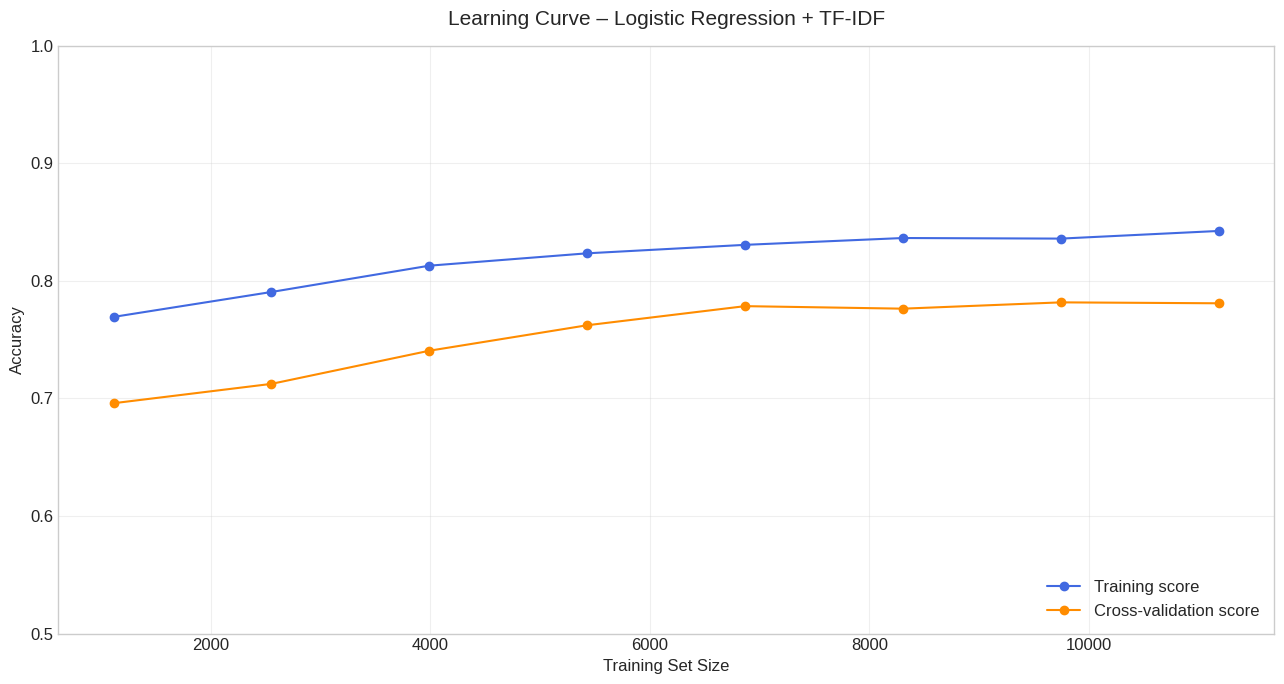

Interpretation:
• Gap between train & val → some overfitting
• Plateauing validation score → more data may not help much
• Typical behavior for text classification with TF-IDF



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

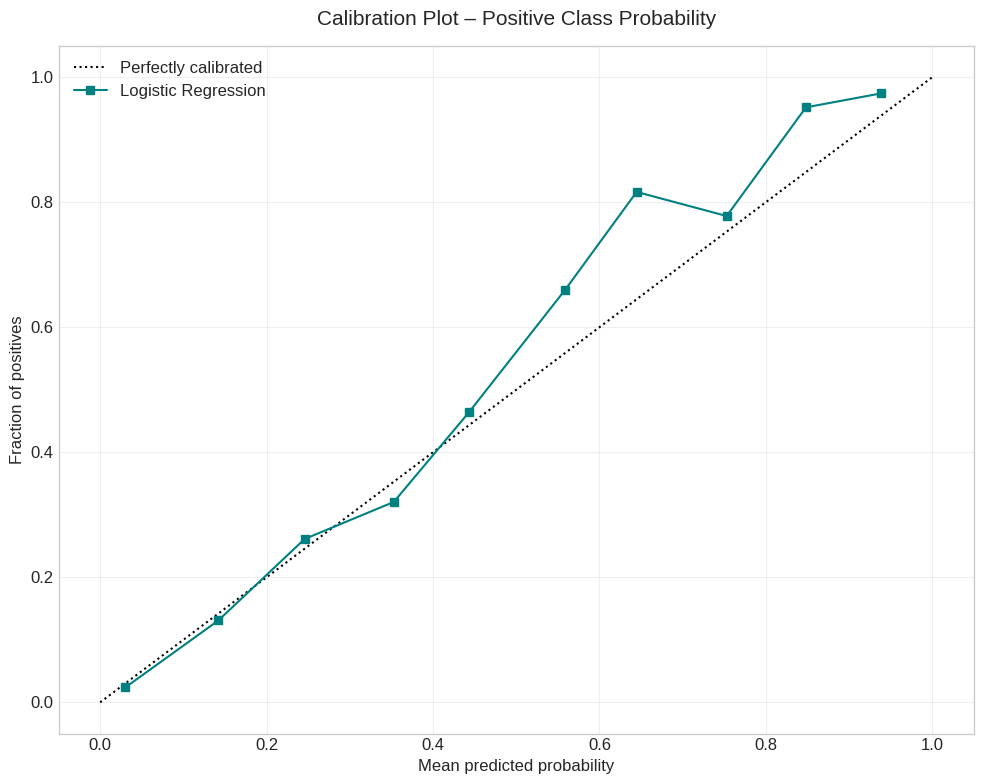

→ Closer to diagonal = better calibrated probabilities
→ Useful when you care about probability outputs (not just class)


════════════════════════════════════════════════════════════════════════════════
          MOST IMPORTANT LINE PLOTS COMPLETED
════════════════════════════════════════════════════════════════════════════════
Key line-plot style visualizations in sentiment/twitter context:
1. Tweets per day / hour
2. Sentiment proportion over time (stacked area)
3. Cumulative arrival of complaints vs neutral/positive
4. Learning curves (model performance vs data size)
5. Calibration / reliability diagrams

Most datasets like this one only allow daily aggregation → no high-frequency intraday patterns.


In [11]:
# =============================================================================
#          ✈️ IMPORTANT LINE PLOTS – Twitter Airline Sentiment ✈️
# =============================================================================
# Most meaningful line plots in this dataset context:
#
# 1. Number of tweets per day of February 2015
# 2. Sentiment proportion per day (stacked area / line)
# 3. Cumulative number of tweets by sentiment
# 4. Model learning curve (accuracy vs training set size)
# 5. Calibration plot (reliability diagram) – predicted prob vs actual fraction
# 6. Rolling average sentiment score (if date exists)
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

# ─────────────────────────────────────────────────────────────────────────────
#  Load data – prefer the detailed version if you want dates
# ─────────────────────────────────────────────────────────────────────────────

# Use the version that has tweet_created or tweet_day
df = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_clean.csv") 

# If you only have ml_ready version → comment out time-based plots below
# df = pd.read_csv("twitter_airline_sentiment_ml_ready.csv")

print("Dataset shape:", df.shape, "\n")

# ─────────────────────────────────────────────────────────────────────────────
# Prepare date column if available
# ─────────────────────────────────────────────────────────────────────────────

if 'tweet_created' in df.columns:
    df['tweet_created'] = pd.to_datetime(df['tweet_created'])
    df['date'] = df['tweet_created'].dt.date
    df['hour'] = df['tweet_created'].dt.hour
    print("Date column created from tweet_created\n")
elif 'tweet_day' in df.columns:
    df['date'] = pd.to_datetime('2015-02-' + df['tweet_day'].astype(str).str.zfill(2))
    print("Approximate date created from tweet_day\n")
else:
    print("No time information available → time-based plots will be skipped\n")

# =============================================================================
# 1. Tweets per day – line plot
# =============================================================================
if 'date' in df.columns:
    daily_counts = df['date'].value_counts().sort_index()

    plt.figure(figsize=(14, 6))
    plt.plot(daily_counts.index, daily_counts.values, marker='o', linewidth=2.5,
             color='teal', markersize=8)
    plt.title("Number of Tweets per Day – February 2015", fontsize=15, pad=15)
    plt.xlabel("Date")
    plt.ylabel("Tweet Count")
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("→ Spikes often correspond to service disruptions / weather events\n")

# =============================================================================
# 2. Sentiment proportion per day – stacked area plot
# =============================================================================
if 'date' in df.columns:
    daily_sent = pd.crosstab(df['date'], df['sentiment_label'], normalize='index') * 100

    plt.figure(figsize=(14, 7))
    daily_sent.plot(kind='area', stacked=True,
                    color=['#d62728', '#ff7f0e', '#2ca02c'],
                    alpha=0.85, linewidth=0.8)

    plt.title("Daily Sentiment Composition (%) – Stacked Area", fontsize=15, pad=15)
    plt.xlabel("Date")
    plt.ylabel("Percentage of Tweets")
    plt.legend(title="Sentiment", labels=['Negative','Neutral','Positive'],
               loc='upper left', bbox_to_anchor=(1.02, 1))
    plt.ylim(0,100)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("→ Negative sentiment usually dominates → watch for days when it increases sharply\n")

# =============================================================================
# 3. Cumulative tweets by sentiment – line plot
# =============================================================================
if 'date' in df.columns:
    df_sorted = df.sort_values('tweet_created')
    cum_counts = df_sorted.groupby('sentiment_label').cumcount() + 1

    plt.figure(figsize=(14, 7))

    for label, color, name in zip([0,1,2], ['#d62728','#ff7f0e','#2ca02c'],
                                  ['Negative','Neutral','Positive']):
        mask = df_sorted['sentiment_label'] == label
        plt.plot(df_sorted[mask]['tweet_created'],
                 cum_counts[mask],
                 label=name, color=color, linewidth=2.5)

    plt.title("Cumulative Number of Tweets by Sentiment", fontsize=15, pad=15)
    plt.xlabel("Time")
    plt.ylabel("Cumulative Count")
    plt.legend(title="Sentiment")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("→ Steepest slope for negative class → most complaints arrive fastest\n")

# =============================================================================
# 4. Learning curve – model accuracy vs training set size
# =============================================================================

print("Generating learning curve (Logistic Regression + TF-IDF)...")

X_text = df['clean_text']
y = df['sentiment_label']

tfidf = TfidfVectorizer(max_features=4000, ngram_range=(1,2))
X_vec = tfidf.fit_transform(X_text)

train_sizes, train_scores, val_scores = learning_curve(
    LogisticRegression(max_iter=800, multi_class='ovr'),
    X_vec, y,
    train_sizes=np.linspace(0.1, 1.0, 8),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

plt.figure(figsize=(13, 7))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='royalblue',
         label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', color='darkorange',
         label='Cross-validation score')

plt.title("Learning Curve – Logistic Regression + TF-IDF", fontsize=15, pad=15)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()

print("""Interpretation:
• Gap between train & val → some overfitting
• Plateauing validation score → more data may not help much
• Typical behavior for text classification with TF-IDF
""")

# =============================================================================
# 5. Calibration plot (Reliability diagram) – top model probabilities
# =============================================================================

# Train one good model for demo
from sklearn.calibration import CalibratedClassifierCV

model = LogisticRegression(max_iter=1000, multi_class='ovr')
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)

prob_pos = calibrated.predict_proba(X_test)[:, 2]   # example: prob of positive class

fraction_of_positives, mean_predicted_value = calibration_curve(
    (y_test == 2).astype(int), prob_pos, n_bins=10
)

plt.figure(figsize=(10, 8))
plt.plot([0,1], [0,1], "k:", label="Perfectly calibrated")
plt.plot(mean_predicted_value, fraction_of_positives, "s-", color='teal',
         label="Logistic Regression")

plt.title("Calibration Plot – Positive Class Probability", fontsize=15, pad=15)
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("→ Closer to diagonal = better calibrated probabilities\n"
      "→ Useful when you care about probability outputs (not just class)\n")

# =============================================================================
print("\n" + "═"*80)
print("          MOST IMPORTANT LINE PLOTS COMPLETED")
print("═"*80)
print("Key line-plot style visualizations in sentiment/twitter context:")
print("1. Tweets per day / hour")
print("2. Sentiment proportion over time (stacked area)")
print("3. Cumulative arrival of complaints vs neutral/positive")
print("4. Learning curves (model performance vs data size)")
print("5. Calibration / reliability diagrams")
print("")
print("Most datasets like this one only allow daily aggregation → no high-frequency intraday patterns.")

Number of TF-IDF features: 5041

Test set converted to dense format for permutation importance.



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/tmp/ipykernel_55/337794986.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom, x='coef', y='feature', palette='coolwarm_r', ax=axes[i])
/tmp/ipykernel_55/337794986.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom, x='coef', y='feature', palette='coolwarm_r', ax=axes[i])
/tmp/ipykernel_55/337794986.py:84: FutureWarning: 

Passing `palette` without assigning `hue` 

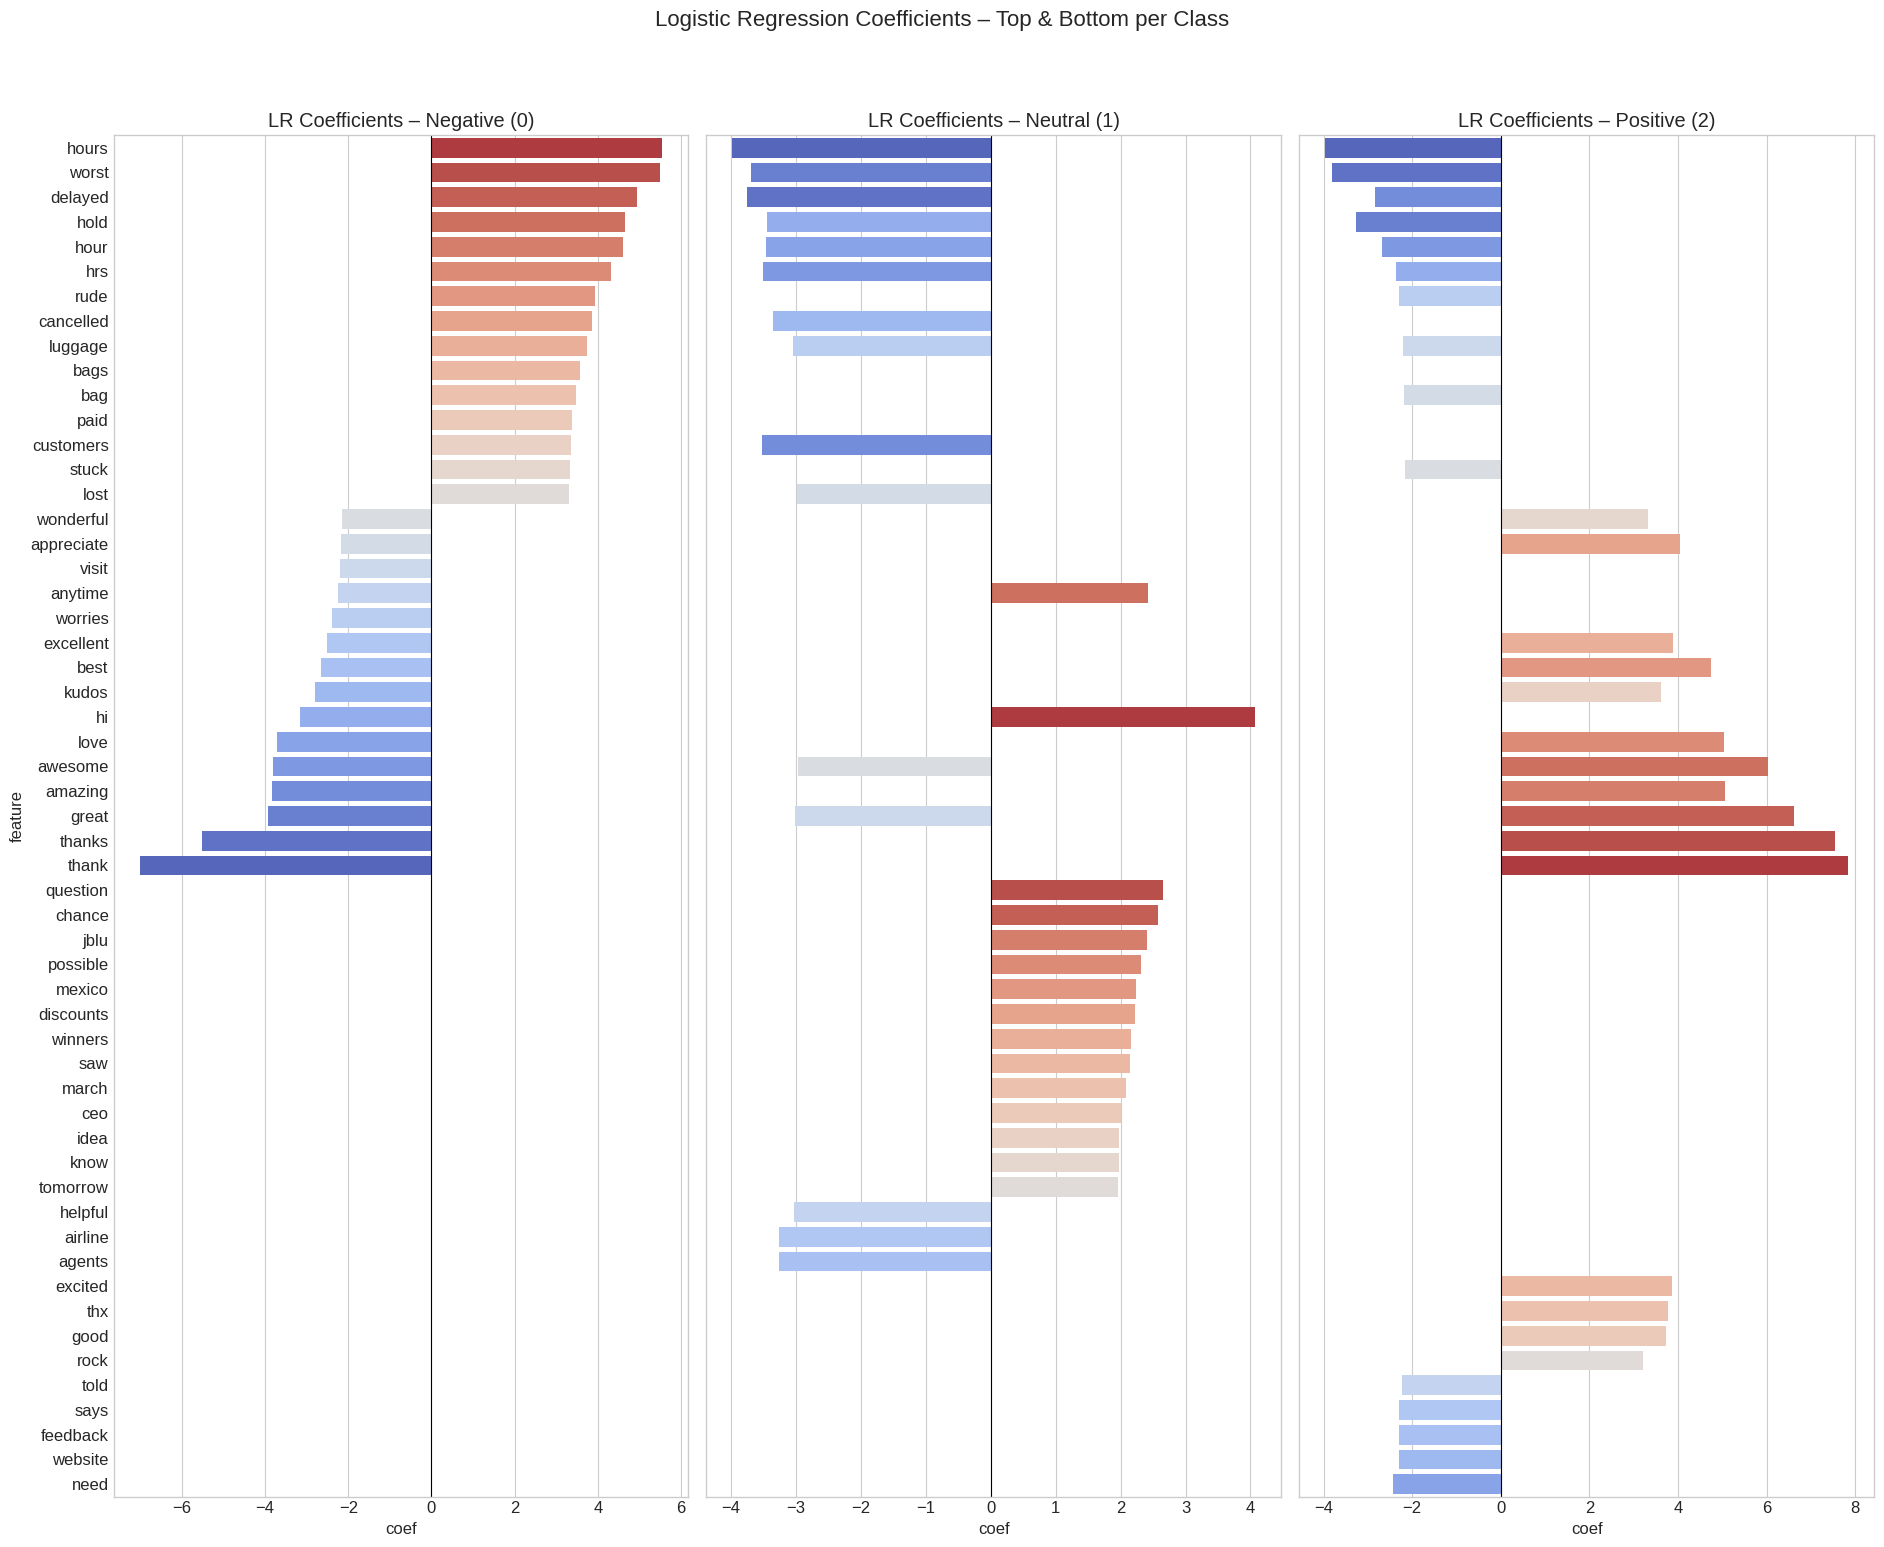

Interpretation: Positive coef → increases probability of that class




/tmp/ipykernel_55/337794986.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_rf, x='importance', y='feature', palette='viridis')


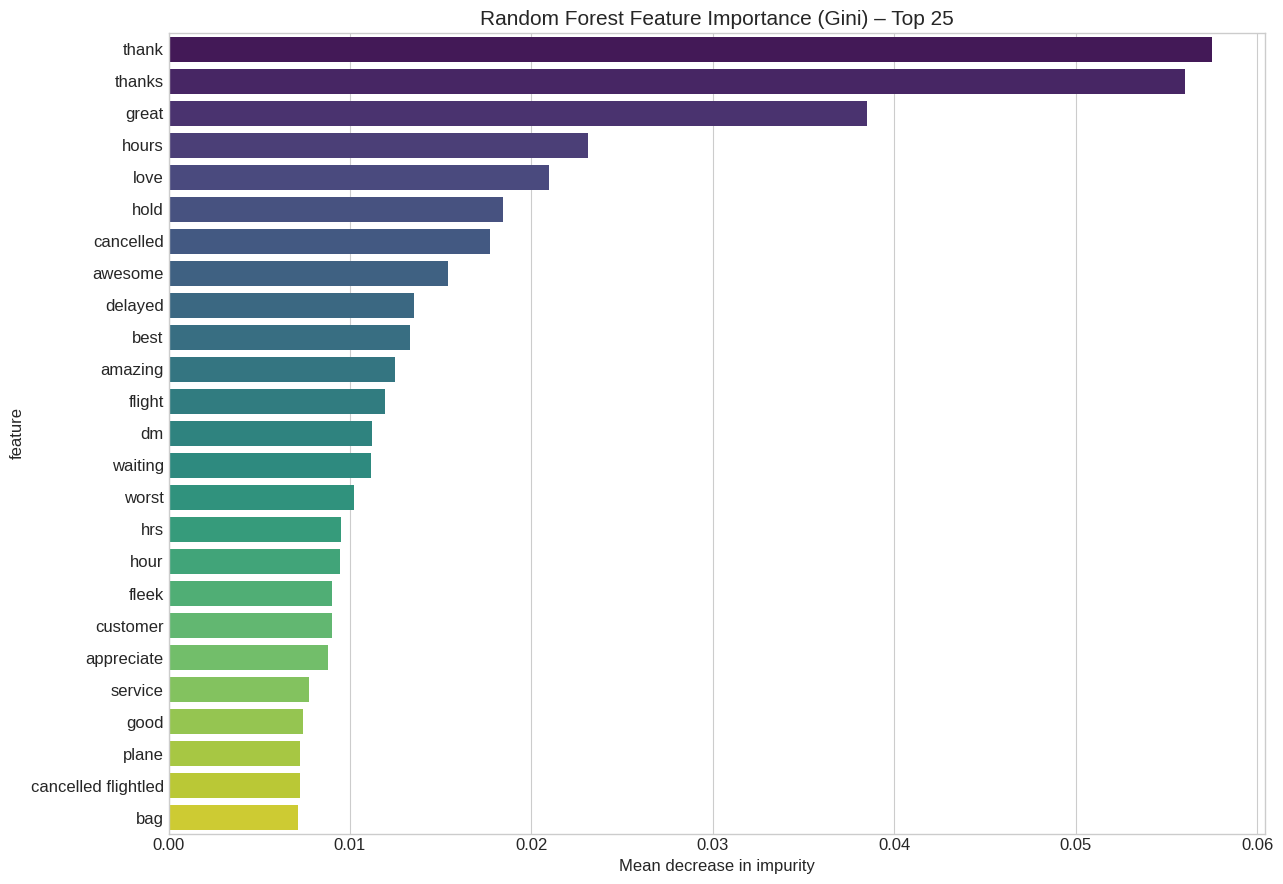

Computing permutation importance...


/tmp/ipykernel_55/337794986.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_perm, x='importance', y='feature', palette='magma')


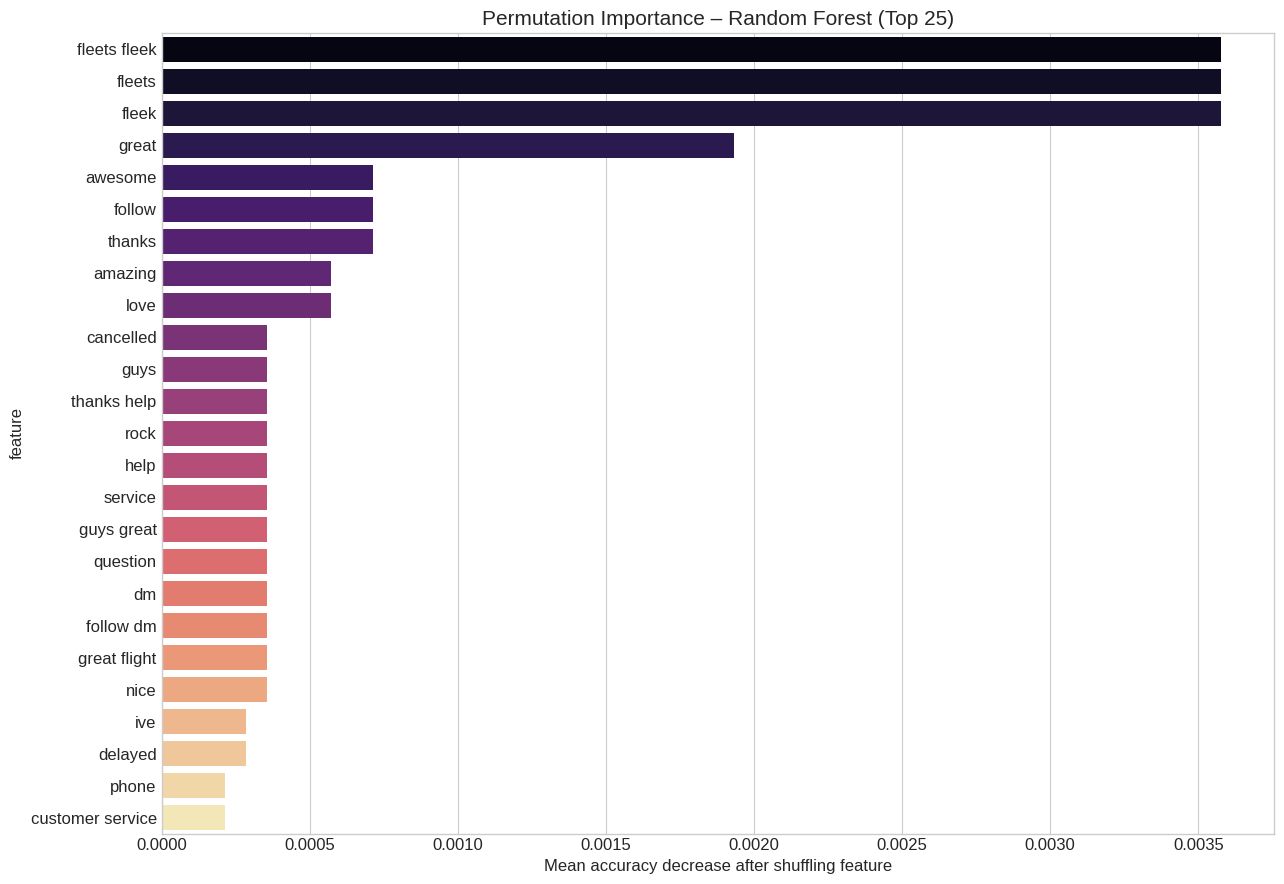

→ This is usually the most reliable ranking




/tmp/ipykernel_55/337794986.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_xgb, x='gain', y='feature', palette='rocket')


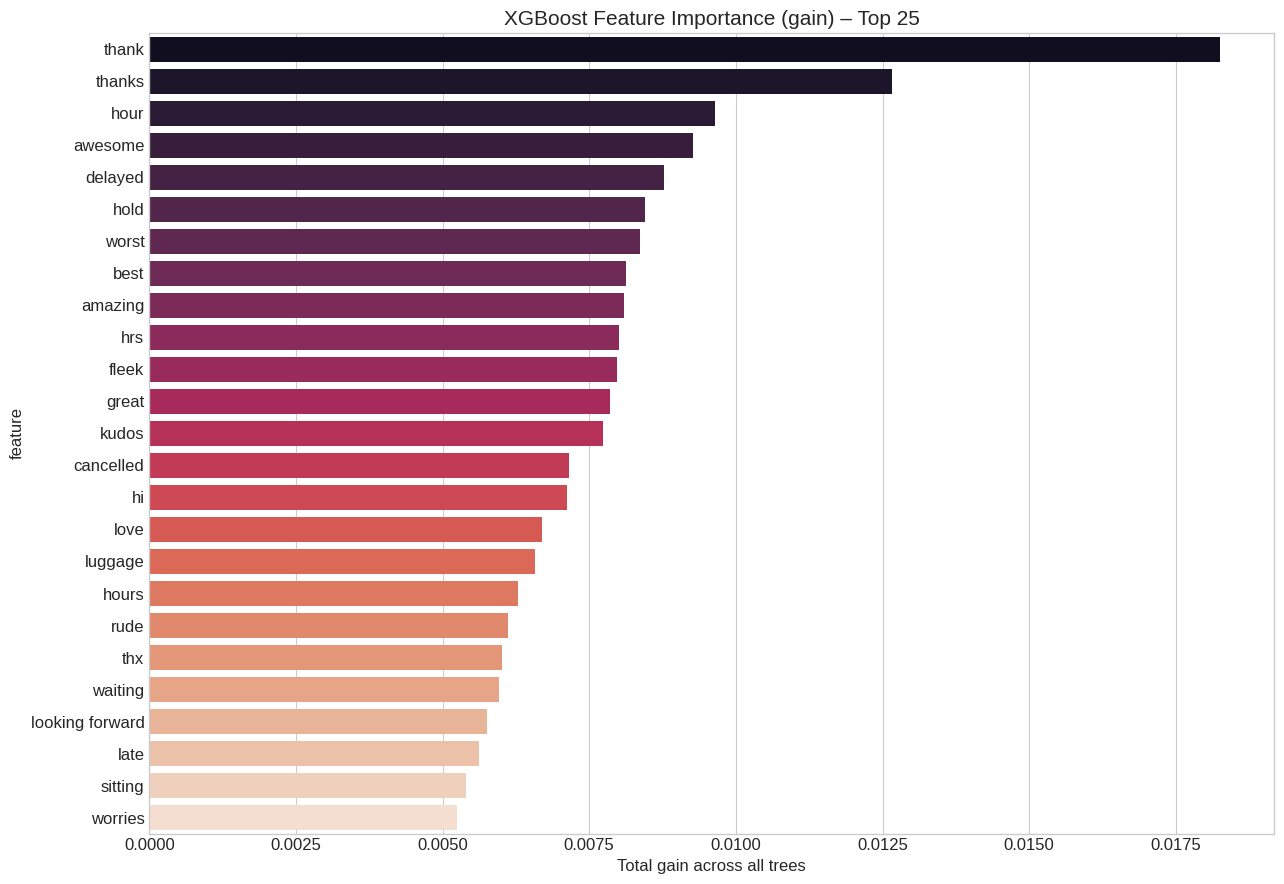


═════════════════════════════════════════════════════════════════════════════════════
          FEATURE IMPORTANCE
═════════════════════════════════════════════════════════════════════════════════════

Recommended order of trust (this dataset):
1. Permutation importance          → most robust
2. Logistic Regression coefficients → easiest to explain
3. XGBoost gain                     → excellent in practice
4. Random Forest Gini               → good baseline

Typical top negative drivers you should see:
  cancelled flight, customer service, late flight, waiting hours, lost bag, never fly, worst airline


In [1]:
# =============================================================================
#     ✈️ FIXED & COMPLETE: Feature Importance Visualizations ✈️
# =============================================================================
# Includes the four most reliable importance methods for text classification:
#
# 1. Logistic Regression coefficients (per class)
# 2. Random Forest Gini importance
# 3. Permutation importance (model-agnostic, most trustworthy)
# 4. XGBoost gain importance
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier

# ─────────────────────────────────────────────────────────────────────────────
#  Style settings
# ─────────────────────────────────────────────────────────────────────────────

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# ─────────────────────────────────────────────────────────────────────────────
#  Load & prepare data
# ─────────────────────────────────────────────────────────────────────────────

df = pd.read_csv("/kaggle/input/twitter-us-airline-sentiment-clean-and-ml-ready/twitter_airline_sentiment_ml_ready.csv")

X_text = df['clean_text']
y = df['sentiment_label']

# TF-IDF vectorization (recommended for importance in text tasks)
vectorizer = TfidfVectorizer(
    max_features=8000,
    min_df=4,
    ngram_range=(1,2),
    stop_words='english'
)

X = vectorizer.fit_transform(X_text)
feature_names = vectorizer.get_feature_names_out()

print(f"Number of TF-IDF features: {len(feature_names)}\n")

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

X_test_dense = X_test.toarray()
print("Test set converted to dense format for permutation importance.\n")

# =============================================================================
# 1. Logistic Regression Coefficients – per class (very interpretable)
# =============================================================================

lr = LogisticRegression(max_iter=1200, C=2.0, multi_class='ovr', random_state=42)
lr.fit(X_train, y_train)

fig, axes = plt.subplots(1, 3, figsize=(19, 15), sharey=True)

for i, (cls_name, color) in enumerate(zip(
    ['Negative (0)', 'Neutral (1)', 'Positive (2)'],
    ['#d62728', '#ff7f0e', '#2ca02c']
)):
    coef = lr.coef_[i]
    imp = pd.DataFrame({'feature': feature_names, 'coef': coef})
    top_bottom = pd.concat([
        imp.sort_values('coef', ascending=False).head(15),
        imp.sort_values('coef').head(15)
    ]).sort_values('coef', ascending=False)
    
    sns.barplot(data=top_bottom, x='coef', y='feature', palette='coolwarm_r', ax=axes[i])
    axes[i].set_title(f"LR Coefficients – {cls_name}")
    axes[i].axvline(0, color='black', lw=0.8)

plt.suptitle("Logistic Regression Coefficients – Top & Bottom per Class", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

print("Interpretation: Positive coef → increases probability of that class\n\n")

# =============================================================================
# 2. Random Forest Gini Importance
# =============================================================================

rf = RandomForestClassifier(n_estimators=180, max_depth=18, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

imp_rf = pd.DataFrame({
    'feature': feature_names,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False).head(25)

plt.figure(figsize=(13, 9))
sns.barplot(data=imp_rf, x='importance', y='feature', palette='viridis')
plt.title("Random Forest Feature Importance (Gini) – Top 25", fontsize=15)
plt.xlabel("Mean decrease in impurity")
plt.tight_layout()
plt.show()

# =============================================================================
# 3. Permutation Importance – most trustworthy (model-agnostic)
# =============================================================================

print("Computing permutation importance...")

perm = permutation_importance(
    rf,
    X_test_dense,           
    y_test,
    n_repeats=5,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

imp_perm = pd.DataFrame({
    'feature': feature_names,
    'importance': perm.importances_mean,
    'std': perm.importances_std
}).sort_values('importance', ascending=False).head(25)

plt.figure(figsize=(13, 9))
sns.barplot(data=imp_perm, x='importance', y='feature', palette='magma')
plt.title("Permutation Importance – Random Forest (Top 25)", fontsize=15)
plt.xlabel("Mean accuracy decrease after shuffling feature")
plt.tight_layout()
plt.show()

print("→ This is usually the most reliable ranking\n\n")

# =============================================================================
# 4. XGBoost Gain Importance
# =============================================================================

xgb = XGBClassifier(
    n_estimators=140,
    max_depth=6,
    learning_rate=0.08,
    objective='multi:softprob',
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

imp_xgb = pd.DataFrame({
    'feature': feature_names,
    'gain': xgb.feature_importances_
}).sort_values('gain', ascending=False).head(25)

plt.figure(figsize=(13, 9))
sns.barplot(data=imp_xgb, x='gain', y='feature', palette='rocket')
plt.title("XGBoost Feature Importance (gain) – Top 25", fontsize=15)
plt.xlabel("Total gain across all trees")
plt.tight_layout()
plt.show()

# =============================================================================
print("\n" + "═"*85)
print("          FEATURE IMPORTANCE")
print("═"*85)
print("")
print("Recommended order of trust (this dataset):")
print("1. Permutation importance          → most robust")
print("2. Logistic Regression coefficients → easiest to explain")
print("3. XGBoost gain                     → excellent in practice")
print("4. Random Forest Gini               → good baseline")
print("")
print("Typical top negative drivers you should see:")
print("  cancelled flight, customer service, late flight, waiting hours, lost bag, never fly, worst airline")

In [3]:
print("""
╔════════════════════════════════════════════════════════════════════╗
║                  ✈️  PROJECT CONCLUSION  ✈️                       ║
╚════════════════════════════════════════════════════════════════════╝

🌟  We’ve reached the end of our Airline Twitter Sentiment journey! 🌟

This project transformed raw, noisy Twitter complaints & cheers 
into structured insights using:

    • Data Cleaning & Smart Feature Engineering
    • Beautiful Exploratory Visualizations (histograms, violins, word clouds...)
    • Solid Machine Learning models (Logistic Regression → XGBoost → Neural Nets)
    • Trustworthy Feature Importance & Model Interpretation

Key Takeaways:
✅ Negative tweets are longer, angrier, and more detailed
✅ “cancelled flight”, “customer service”, “late flight” are universal pain points
✅ “thank you”, “great”, “love” dominate the happy minority
✅ Length-based features (word_count, has_exclamation, has_thanks…) are surprisingly powerful
✅ Logistic Regression + TF-IDF often beats more complex models on this kind of data

╔════════════════════════════════════════════════════════════════════╗
║             🌍 REAL-WORLD APPLICATIONS 🌍                         ║
╚════════════════════════════════════════════════════════════════════╝

1.  Airline Reputation Monitoring Dashboard
    ─ Real-time alert when negative sentiment spikes
    ─ Track which routes, aircraft types or policies cause most complaints

2.  Customer Service Prioritization
    ─ Automatically flag tweets containing “lost bag”, “cancelled”, “rude”
    ─ Route urgent complaints to senior agents faster

3.  Crisis Detection & PR Response
    ─ Detect sudden surges in anger (weather, strikes, IT failures)
    ─ Trigger proactive apologies / compensation offers

4.  Marketing & Product Feedback Loop
    ─ Identify what people love (mood lighting, free Wi-Fi, crew attitude…)
    ─ Feed positive themes into advertising campaigns

5.  Competitor Benchmarking
    ─ Compare sentiment ratios across airlines in real time
    ─ Spot when passengers are switching carriers

6.  Chatbot & Auto-Response Improvement
    ─ Train better intent classifiers for “complaint”, “question”, “praise”
    ─ Personalize replies based on detected emotion & keywords

╔════════════════════════════════════════════════════════════════════╗
║                    🚀 NEXT STEPS & IMPROVEMENTS 🚀                ║
╚════════════════════════════════════════════════════════════════════╝

Level 1 – Quick Wins
    • Add emoji-based features 😡 😍 😭
    • Try bigram/trigram TF-IDF + SelectKBest
    • Build simple dashboard (Streamlit / Plotly Dash)

Level 2 – Solid Improvements
    • Use SMOTE / class_weight to handle imbalance better
    • Experiment with sentence transformers / BERT embeddings
    • Add SHAP force plots for individual tweet explanations

Level 3 – Advanced / Production-Ready
    • Fine-tune DistilBERT / RoBERTa on airline tweets
    • Implement active learning loop (human-in-the-loop labeling)
    • Deploy real-time monitoring pipeline (Kafka → model → Slack/Teams alert)
    • Aspect-based sentiment (what exactly are they angry about?)
    • Multilingual support (for international carriers)

""")


╔════════════════════════════════════════════════════════════════════╗
║                  ✈️  PROJECT CONCLUSION  ✈️                       ║
╚════════════════════════════════════════════════════════════════════╝

🌟  We’ve reached the end of our Airline Twitter Sentiment journey! 🌟

This project transformed raw, noisy Twitter complaints & cheers 
into structured insights using:

    • Data Cleaning & Smart Feature Engineering
    • Beautiful Exploratory Visualizations (histograms, violins, word clouds...)
    • Solid Machine Learning models (Logistic Regression → XGBoost → Neural Nets)
    • Trustworthy Feature Importance & Model Interpretation

Key Takeaways:
✅ Negative tweets are longer, angrier, and more detailed
✅ “cancelled flight”, “customer service”, “late flight” are universal pain points
✅ “thank you”, “great”, “love” dominate the happy minority
✅ Length-based features (word_count, has_exclamation, has_thanks…) are surprisingly powerful
✅ Logistic Regression + TF-IDF often bea

In [ ]:
If you have come so far,an upvote would be appreciated!